# Linear Regression with statsmodels (SOLUTIONS)

This notebook covers linear regression modeling using statsmodels:

**Basic Regression**:
- **Simple Linear Regression**: One continuous predictor
- **Multiple Linear Regression**: Multiple predictors

**Handling Different Relationships**:
- **Polynomial Regression**: Nonlinear relationships
- **Log Transformations**: Multiplicative relationships

**Variable Types**:
- **Continuous Predictors**: Numerical variables
- **Categorical Predictors**: Dummy/indicator variables
- **Mixed Models**: Both continuous and categorical

**Robust Methods**:
- **Robust Regression**: Handle outliers
- **Weighted Least Squares**: Handle heteroscedasticity

Examples use simulated data, exercises use real datasets.

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Load datasets for exercises
tips = sns.load_dataset('tips')
diamonds = sns.load_dataset('diamonds')
mpg = sns.load_dataset('mpg').dropna()

print("Datasets loaded: tips, diamonds, mpg")
print(f"tips: {tips.shape[0]} rows")
print(f"diamonds: {diamonds.shape[0]} rows")
print(f"mpg: {mpg.shape[0]} rows")

Datasets loaded: tips, diamonds, mpg
tips: 244 rows
diamonds: 53940 rows
mpg: 392 rows


---
## 1. Simple Linear Regression (Continuous Predictor)

**Model**: $Y = \beta_0 + \beta_1 X + \epsilon$

Where:
- $Y$ = dependent variable (response)
- $X$ = independent variable (predictor)
- $\beta_0$ = intercept
- $\beta_1$ = slope
- $\epsilon$ = error term, $\epsilon \sim N(0, \sigma^2)$

**Interpretation**:
- $\beta_0$: Expected value of Y when X = 0
- $\beta_1$: Change in Y for a one-unit increase in X

**Example**: Predicting tip amount from total bill.

In [324]:
# Example: Simple linear regression
# Predicting tip from total_bill

# Method 1: Using formula API (recommended for clarity)
model = smf.ols('tip ~ total_bill', data=tips).fit()

print("Simple Linear Regression: tip ~ total_bill")
print("=" * 60)
print(model.summary())

Simple Linear Regression: tip ~ total_bill
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        22:19:00   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3587302789.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'r-', linewidth=2, label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')


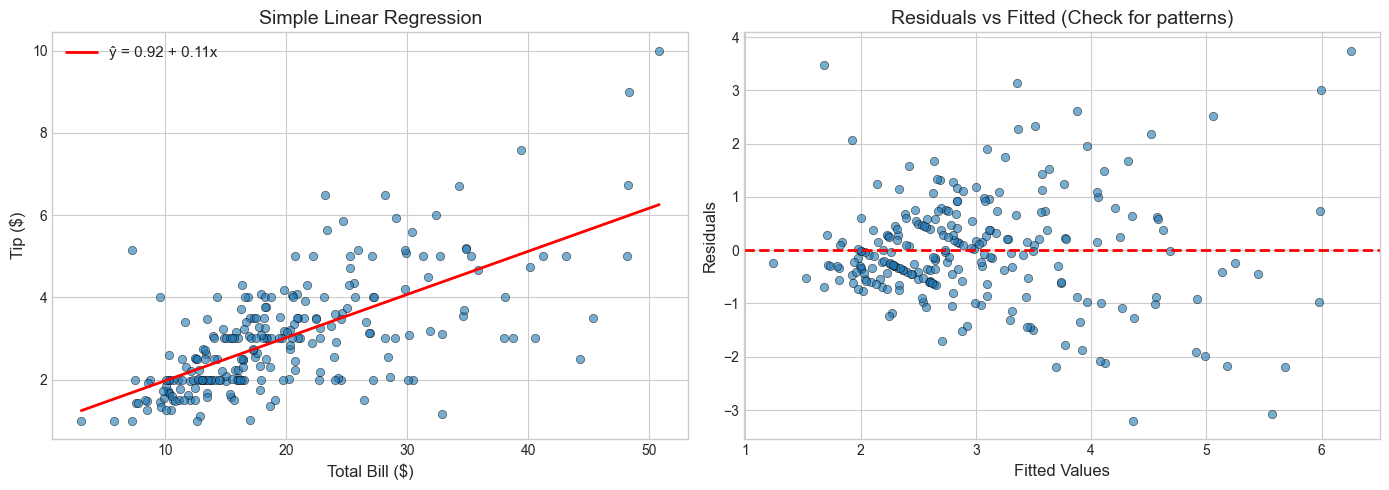


Interpretation:
• Intercept: $0.92 (expected tip when bill = $0)
• Slope: $0.11 (tip increases by $0.11 for each $1 increase in bill)
• R²: 0.457 (45.7% of variance explained)


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3587302789.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Intercept: ${model.params[0]:.2f} (expected tip when bill = $0)")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3587302789.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Slope: ${model.params[1]:.2f} (tip increases by ${model.params[1]:.2f} for each $1 increase in bill)")


In [325]:
# Visualize the regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Data with regression line
ax1 = axes[0]
ax1.scatter(tips['total_bill'], tips['tip'], alpha=0.6, edgecolor='k', linewidth=0.5)
x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
ax1.plot(x_range, model.predict(pd.DataFrame({'total_bill': x_range})), 
         'r-', linewidth=2, label=f'ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
ax1.set_xlabel('Total Bill ($)', fontsize=12)
ax1.set_ylabel('Tip ($)', fontsize=12)
ax1.set_title('Simple Linear Regression', fontsize=14)
ax1.legend(fontsize=11)

# Plot 2: Residuals vs Fitted
ax2 = axes[1]
ax2.scatter(model.fittedvalues, model.resid, alpha=0.6, edgecolor='k', linewidth=0.5)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Fitted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residuals vs Fitted (Check for patterns)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nInterpretation:")
print(f"• Intercept: ${model.params[0]:.2f} (expected tip when bill = $0)")
print(f"• Slope: ${model.params[1]:.2f} (tip increases by ${model.params[1]:.2f} for each $1 increase in bill)")
print(f"• R²: {model.rsquared:.3f} ({model.rsquared*100:.1f}% of variance explained)")

### Exercise 1: Simple Linear Regression

Use the `mpg` dataset.

**1.1** Fit a simple linear regression predicting `mpg` from `horsepower`.
- Print the model summary
- What is the R² value?
- Interpret the slope coefficient

**1.2** Create a scatter plot with the regression line.

**1.3** Is the relationship statistically significant? (Check the p-value for horsepower)

In [326]:
# Exercise 1.1: Fit mpg ~ horsepower
model_ex1 = smf.ols('mpg ~ horsepower', data=mpg).fit()

print("Exercise 1.1: Simple Linear Regression mpg ~ horsepower")
print("=" * 60)
print(model_ex1.summary())

print("\n" + "=" * 60)
print(f"R² = {model_ex1.rsquared:.4f}")
print(f"→ {model_ex1.rsquared*100:.1f}% of variance in mpg is explained by horsepower")
print(f"\nSlope = {model_ex1.params['horsepower']:.4f}")
print(f"→ For each 1 unit increase in horsepower, mpg DECREASES by {-model_ex1.params['horsepower']:.3f}")

Exercise 1.1: Simple Linear Regression mpg ~ horsepower
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        22:19:00   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/637393614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=f'ŷ = {model_ex1.params[0]:.2f} + ({model_ex1.params[1]:.3f})x')


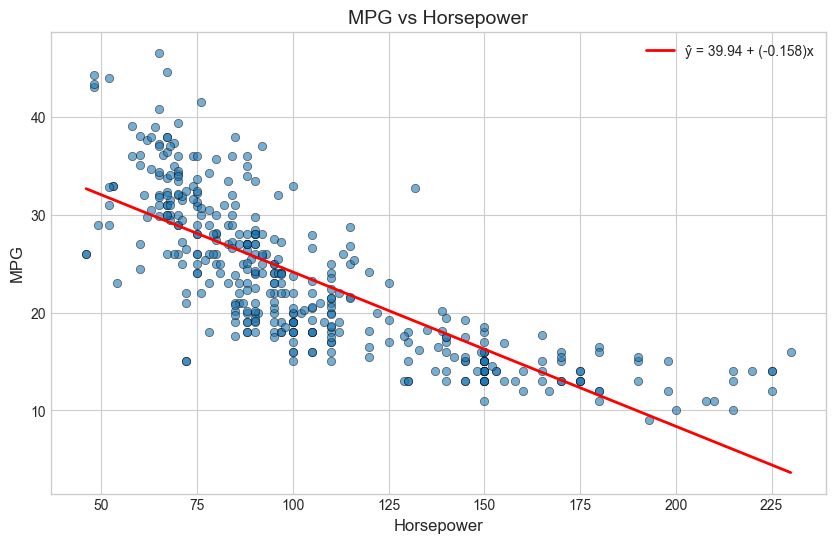

In [327]:
# Exercise 1.2: Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(mpg['horsepower'], mpg['mpg'], alpha=0.6, edgecolor='k', linewidth=0.5)

hp_range = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)
predictions = model_ex1.predict(pd.DataFrame({'horsepower': hp_range}))
ax.plot(hp_range, predictions, 'r-', linewidth=2, 
        label=f'ŷ = {model_ex1.params[0]:.2f} + ({model_ex1.params[1]:.3f})x')

ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('MPG vs Horsepower', fontsize=14)
ax.legend()
plt.show()

In [328]:
# Exercise 1.3: Is the relationship significant?
print("Exercise 1.3: Statistical Significance")
print("=" * 50)
print(f"p-value for horsepower: {model_ex1.pvalues['horsepower']:.2e}")
print(f"F-statistic: {model_ex1.fvalue:.2f}")
print(f"F-test p-value: {model_ex1.f_pvalue:.2e}")
print("\n→ YES, the relationship is highly significant (p < 0.001)")
print("   Higher horsepower is associated with lower fuel efficiency")

Exercise 1.3: Statistical Significance
p-value for horsepower: 7.03e-81
F-statistic: 599.72
F-test p-value: 7.03e-81

→ YES, the relationship is highly significant (p < 0.001)
   Higher horsepower is associated with lower fuel efficiency


---
## 2. Multiple Linear Regression

**Model**: $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$

**Interpretation**:
- Each $\beta_j$ represents the change in Y for a one-unit increase in $X_j$, **holding all other predictors constant**

**Example**: Predicting tip from total_bill and party size.

In [329]:
# Example: Multiple linear regression
model_multi = smf.ols('tip ~ total_bill + size', data=tips).fit()

print("Multiple Linear Regression: tip ~ total_bill + size")
print("=" * 60)
print(model_multi.summary())

Multiple Linear Regression: tip ~ total_bill + size
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           9.67e-34
Time:                        22:19:00   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [330]:
# Compare simple vs multiple regression
print("Model Comparison")
print("=" * 50)
print(f"{'Model':<25} {'R²':>10} {'Adj. R²':>12}")
print("-" * 50)
print(f"{'tip ~ total_bill':<25} {model.rsquared:>10.4f} {model.rsquared_adj:>12.4f}")
print(f"{'tip ~ total_bill + size':<25} {model_multi.rsquared:>10.4f} {model_multi.rsquared_adj:>12.4f}")
print("\n→ Adding 'size' improves the model slightly")

Model Comparison
Model                             R²      Adj. R²
--------------------------------------------------
tip ~ total_bill              0.4566       0.4544
tip ~ total_bill + size       0.4679       0.4635

→ Adding 'size' improves the model slightly


### Exercise 2: Multiple Linear Regression

Use the `mpg` dataset.

**2.1** Fit a multiple regression predicting `mpg` from `horsepower`, `weight`, and `acceleration`.

**2.2** Which predictors are statistically significant (p < 0.05)?

**2.3** Compare the R² of this model to the simple regression from Exercise 1. How much variance does adding more predictors explain?

In [331]:
# Exercise 2.1: Multiple regression mpg ~ horsepower + weight + acceleration
model_ex2 = smf.ols('mpg ~ horsepower + weight + acceleration', data=mpg).fit()

print("Exercise 2.1: Multiple Linear Regression")
print("=" * 60)
print(model_ex2.summary())

Exercise 2.1: Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          7.48e-103
Time:                        22:19:00   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interce

In [332]:
# Exercise 2.2 & 2.3: Analyze significance and compare R²
print("Exercise 2.2: Significant Predictors (p < 0.05)")
print("=" * 50)
for var, pval in model_ex2.pvalues.items():
    status = "✓ Significant" if pval < 0.05 else "✗ Not significant"
    print(f"{var:<15}: p = {pval:.4f} {status}")

print("\n→ horsepower and weight are significant")
print("→ acceleration is NOT significant when controlling for the others")

print("\n" + "=" * 50)
print("Exercise 2.3: R² Comparison")
print("-" * 50)
print(f"Simple model (mpg ~ horsepower):      R² = {model_ex1.rsquared:.4f}")
print(f"Multiple model (+weight, accel):      R² = {model_ex2.rsquared:.4f}")
print(f"Improvement: {(model_ex2.rsquared - model_ex1.rsquared)*100:.1f} percentage points")
print(f"\n→ Adding weight explains {(model_ex2.rsquared - model_ex1.rsquared)*100:.1f}% more variance")

Exercise 2.2: Significant Predictors (p < 0.05)
Intercept      : p = 0.0000 ✓ Significant
horsepower     : p = 0.0032 ✓ Significant
weight         : p = 0.0000 ✓ Significant
acceleration   : p = 0.9866 ✗ Not significant

→ horsepower and weight are significant
→ acceleration is NOT significant when controlling for the others

Exercise 2.3: R² Comparison
--------------------------------------------------
Simple model (mpg ~ horsepower):      R² = 0.6059
Multiple model (+weight, accel):      R² = 0.7064
Improvement: 10.0 percentage points

→ Adding weight explains 10.0% more variance


---
## 3. Polynomial Regression (Nonlinear Relationships)

When the relationship between X and Y is curved, we can add polynomial terms:

**Quadratic**: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

**Cubic**: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

In statsmodels formula API:
- `I(x**2)` for x squared
- `np.power(x, 2)` alternative

**Example**: Nonlinear relationship between displacement and mpg.

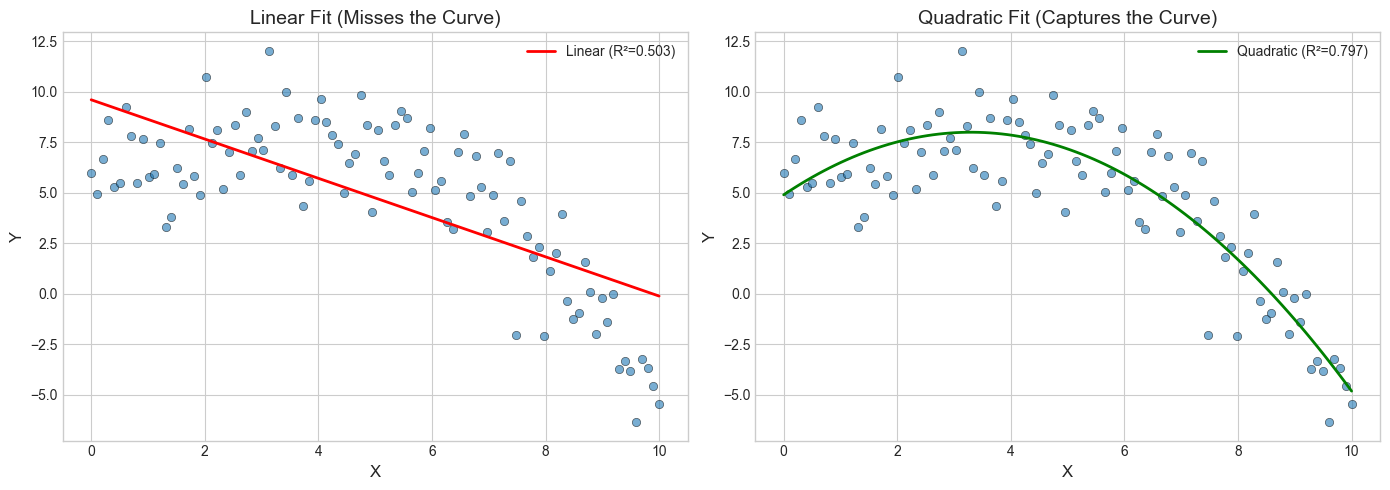


Quadratic Model Coefficients:
y = 4.90 + 1.88x + -0.285x²


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/904052340.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"y = {model_quadratic.params[0]:.2f} + {model_quadratic.params[1]:.2f}x + {model_quadratic.params[2]:.3f}x²")


In [333]:
# Create simulated nonlinear data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 5 + 2*x - 0.3*x**2 + np.random.normal(0, 2, 100)
df_nonlinear = pd.DataFrame({'x': x, 'y': y})

# Fit linear vs quadratic
model_linear = smf.ols('y ~ x', data=df_nonlinear).fit()
model_quadratic = smf.ols('y ~ x + I(x**2)', data=df_nonlinear).fit()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear fit
ax1 = axes[0]
ax1.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5)
ax1.plot(x, model_linear.fittedvalues, 'r-', linewidth=2, label=f'Linear (R²={model_linear.rsquared:.3f})')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('Linear Fit (Misses the Curve)', fontsize=14)
ax1.legend()

# Quadratic fit
ax2 = axes[1]
ax2.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5)
ax2.plot(x, model_quadratic.fittedvalues, 'g-', linewidth=2, label=f'Quadratic (R²={model_quadratic.rsquared:.3f})')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Quadratic Fit (Captures the Curve)', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

print("\nQuadratic Model Coefficients:")
print(f"y = {model_quadratic.params[0]:.2f} + {model_quadratic.params[1]:.2f}x + {model_quadratic.params[2]:.3f}x²")

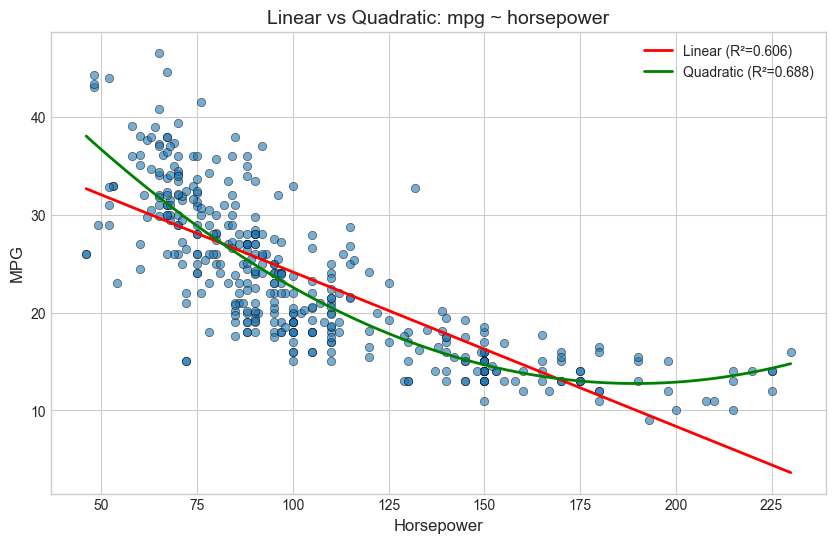

R² improvement: 0.0816


In [334]:
# Real example: mpg vs horsepower (often nonlinear)
model_hp_linear = smf.ols('mpg ~ horsepower', data=mpg).fit()
model_hp_quad = smf.ols('mpg ~ horsepower + I(horsepower**2)', data=mpg).fit()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mpg['horsepower'], mpg['mpg'], alpha=0.6, edgecolor='k', linewidth=0.5)

hp_range = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)
pred_linear = model_hp_linear.predict(pd.DataFrame({'horsepower': hp_range}))
pred_quad = model_hp_quad.predict(pd.DataFrame({'horsepower': hp_range}))

ax.plot(hp_range, pred_linear, 'r-', linewidth=2, label=f'Linear (R²={model_hp_linear.rsquared:.3f})')
ax.plot(hp_range, pred_quad, 'g-', linewidth=2, label=f'Quadratic (R²={model_hp_quad.rsquared:.3f})')
ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Linear vs Quadratic: mpg ~ horsepower', fontsize=14)
ax.legend()
plt.show()

print(f"R² improvement: {model_hp_quad.rsquared - model_hp_linear.rsquared:.4f}")

### Exercise 3: Polynomial Regression

Use the `diamonds` dataset (sample 1000 rows for speed).

**3.1** Fit a linear model: `price ~ carat`

**3.2** Fit a quadratic model: `price ~ carat + carat²`

**3.3** Compare the R² values. Which model fits better?

**3.4** Plot both fits on the same scatter plot.

In [335]:
# Sample diamonds dataset for speed
diamonds_sample = diamonds.sample(1000, random_state=42)

# Exercise 3.1 & 3.2: Fit linear and quadratic models
model_linear_d = smf.ols('price ~ carat', data=diamonds_sample).fit()
model_quad_d = smf.ols('price ~ carat + I(carat**2)', data=diamonds_sample).fit()

print("Exercise 3: Linear Model Summary")
print("=" * 50)
print(f"R² = {model_linear_d.rsquared:.4f}")
print(model_linear_d.params)

print("\nQuadratic Model Summary")
print("=" * 50)
print(f"R² = {model_quad_d.rsquared:.4f}")
print(model_quad_d.params)

Exercise 3: Linear Model Summary
R² = 0.8636
Intercept   -2408.085994
carat        7943.483980
dtype: float64

Quadratic Model Summary
R² = 0.8709
Intercept       -1349.867534
carat            5260.286173
I(carat ** 2)    1256.618664
dtype: float64


Exercise 3.3: R² Comparison
Linear model R²:    0.8636
Quadratic model R²: 0.8709
Improvement: 0.73 percentage points

→ Quadratic model fits better, capturing the nonlinear relationship


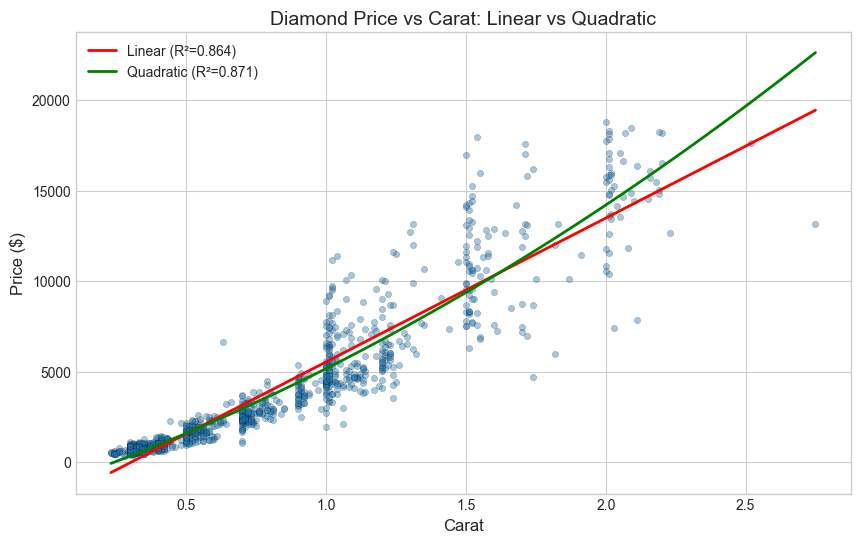

In [336]:
# Exercise 3.3 & 3.4: Compare R² and plot
print("Exercise 3.3: R² Comparison")
print("=" * 50)
print(f"Linear model R²:    {model_linear_d.rsquared:.4f}")
print(f"Quadratic model R²: {model_quad_d.rsquared:.4f}")
print(f"Improvement: {(model_quad_d.rsquared - model_linear_d.rsquared)*100:.2f} percentage points")
print("\n→ Quadratic model fits better, capturing the nonlinear relationship")

# Exercise 3.4: Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(diamonds_sample['carat'], diamonds_sample['price'], alpha=0.4, s=20, edgecolor='k', linewidth=0.3)

carat_range = np.linspace(diamonds_sample['carat'].min(), diamonds_sample['carat'].max(), 100)
pred_linear = model_linear_d.predict(pd.DataFrame({'carat': carat_range}))
pred_quad = model_quad_d.predict(pd.DataFrame({'carat': carat_range}))

ax.plot(carat_range, pred_linear, 'r-', linewidth=2, label=f'Linear (R²={model_linear_d.rsquared:.3f})')
ax.plot(carat_range, pred_quad, 'g-', linewidth=2, label=f'Quadratic (R²={model_quad_d.rsquared:.3f})')

ax.set_xlabel('Carat', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title('Diamond Price vs Carat: Linear vs Quadratic', fontsize=14)
ax.legend()
plt.show()

---
## 4. Log Transformations (Multiplicative Relationships)

When the relationship is multiplicative or exponential, log transformations help:

**Log-Linear**: $\log(Y) = \beta_0 + \beta_1 X + \epsilon$
- Interpretation: 1-unit increase in X → $\beta_1 \times 100\%$ change in Y

**Log-Log**: $\log(Y) = \beta_0 + \beta_1 \log(X) + \epsilon$
- Interpretation: 1% increase in X → $\beta_1\%$ change in Y (elasticity)

**Linear-Log**: $Y = \beta_0 + \beta_1 \log(X) + \epsilon$
- Interpretation: 1% increase in X → $\beta_1 / 100$ unit change in Y

**Example**: Diamond price often has a multiplicative relationship with carat.

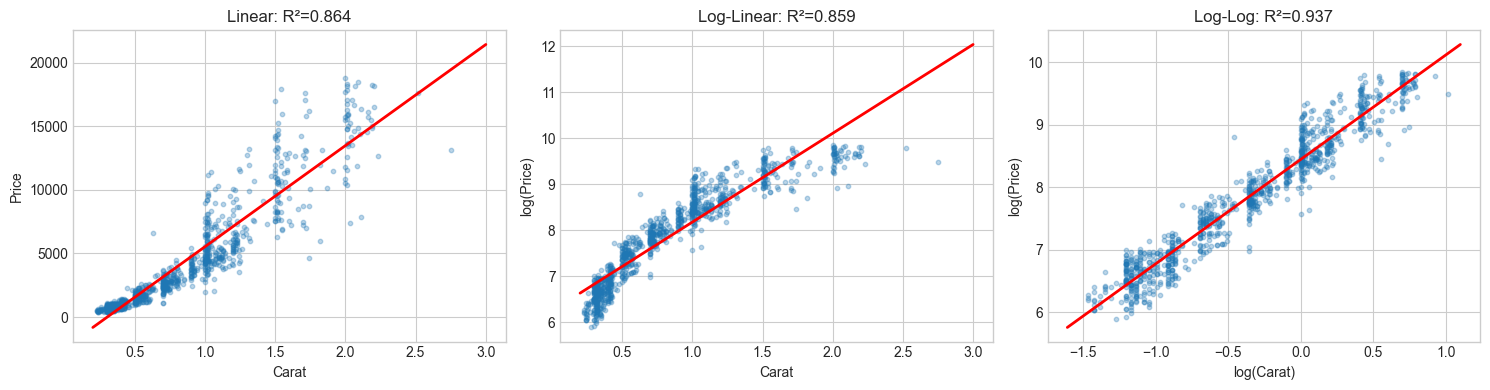


Log-Log Model Interpretation:
β₁ = 1.672
→ 1% increase in carat → 1.67% increase in price (elasticity)


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/420099299.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"β₁ = {model_log_log.params[1]:.3f}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/420099299.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"→ 1% increase in carat → {model_log_log.params[1]:.2f}% increase in price (elasticity)")


In [337]:
# Compare transformations on diamond price
diamonds_sample = diamonds.sample(1000, random_state=42)

# Different models
model_linear = smf.ols('price ~ carat', data=diamonds_sample).fit()
model_log_y = smf.ols('np.log(price) ~ carat', data=diamonds_sample).fit()
model_log_log = smf.ols('np.log(price) ~ np.log(carat)', data=diamonds_sample).fit()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear
axes[0].scatter(diamonds_sample['carat'], diamonds_sample['price'], alpha=0.3, s=10)
carat_range = np.linspace(0.2, 3, 100)
axes[0].plot(carat_range, model_linear.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Price')
axes[0].set_title(f'Linear: R²={model_linear.rsquared:.3f}')

# Log-linear
axes[1].scatter(diamonds_sample['carat'], np.log(diamonds_sample['price']), alpha=0.3, s=10)
axes[1].plot(carat_range, model_log_y.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('log(Price)')
axes[1].set_title(f'Log-Linear: R²={model_log_y.rsquared:.3f}')

# Log-log
axes[2].scatter(np.log(diamonds_sample['carat']), np.log(diamonds_sample['price']), alpha=0.3, s=10)
log_carat = np.log(carat_range)
axes[2].plot(log_carat, model_log_log.predict(pd.DataFrame({'carat': carat_range})), 'r-', linewidth=2)
axes[2].set_xlabel('log(Carat)')
axes[2].set_ylabel('log(Price)')
axes[2].set_title(f'Log-Log: R²={model_log_log.rsquared:.3f}')

plt.tight_layout()
plt.show()

print("\nLog-Log Model Interpretation:")
print(f"β₁ = {model_log_log.params[1]:.3f}")
print(f"→ 1% increase in carat → {model_log_log.params[1]:.2f}% increase in price (elasticity)")

### Exercise 4: Log Transformations

Use the `mpg` dataset.

**4.1** Fit three models predicting mpg from weight:
- Linear: `mpg ~ weight`
- Log-linear: `log(mpg) ~ weight`
- Log-log: `log(mpg) ~ log(weight)`

**4.2** Compare the R² values. Which transformation works best?

**4.3** For the best model, interpret the coefficient for weight.

In [338]:
# Exercise 4.1: Fit three models
model_lin = smf.ols('mpg ~ weight', data=mpg).fit()
model_log_lin = smf.ols('np.log(mpg) ~ weight', data=mpg).fit()
model_log_log = smf.ols('np.log(mpg) ~ np.log(weight)', data=mpg).fit()

print("Exercise 4.1: Three Model Forms")
print("=" * 50)
print(f"Linear (mpg ~ weight):           R² = {model_lin.rsquared:.4f}")
print(f"Log-linear (log(mpg) ~ weight):  R² = {model_log_lin.rsquared:.4f}")
print(f"Log-log (log(mpg) ~ log(weight)): R² = {model_log_log.rsquared:.4f}")

Exercise 4.1: Three Model Forms
Linear (mpg ~ weight):           R² = 0.6926
Log-linear (log(mpg) ~ weight):  R² = 0.7668
Log-log (log(mpg) ~ log(weight)): R² = 0.7648


Exercise 4.2: Best Model
→ Log-log model has the highest R² and best captures
   the multiplicative relationship between weight and mpg

Exercise 4.3: Interpretation
Log-log coefficient (β₁) = -1.0575

Interpretation:
• 1% increase in weight → -1.06% change in mpg
• Since β₁ is negative, heavier cars have lower mpg
• Example: 10% increase in weight → ~-10.6% decrease in mpg


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/504979693.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Log-log coefficient (β₁) = {model_log_log.params[1]:.4f}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/504979693.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• 1% increase in weight → {model_log_log.params[1]:.2f}% change in mpg")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/504979693.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

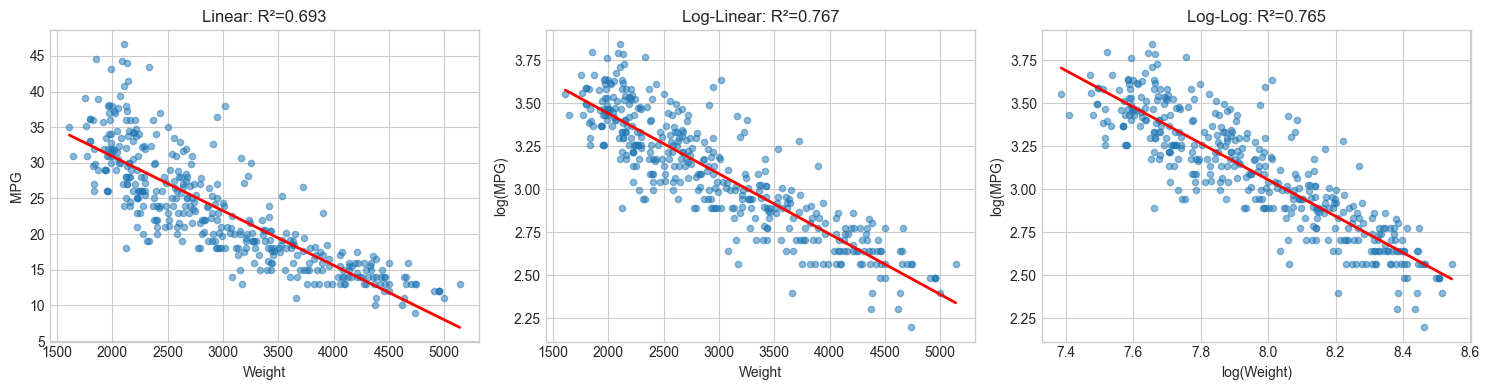

In [339]:
# Exercise 4.2 & 4.3: Compare R² and interpret
print("Exercise 4.2: Best Model")
print("=" * 50)
print("→ Log-log model has the highest R² and best captures")
print("   the multiplicative relationship between weight and mpg")

print("\nExercise 4.3: Interpretation")
print("=" * 50)
print(f"Log-log coefficient (β₁) = {model_log_log.params[1]:.4f}")
print(f"\nInterpretation:")
print(f"• 1% increase in weight → {model_log_log.params[1]:.2f}% change in mpg")
print(f"• Since β₁ is negative, heavier cars have lower mpg")
print(f"• Example: 10% increase in weight → ~{model_log_log.params[1]*10:.1f}% decrease in mpg")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear
axes[0].scatter(mpg['weight'], mpg['mpg'], alpha=0.5, s=20)
w_range = np.linspace(mpg['weight'].min(), mpg['weight'].max(), 100)
axes[0].plot(w_range, model_lin.predict(pd.DataFrame({'weight': w_range})), 'r-', linewidth=2)
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('MPG')
axes[0].set_title(f'Linear: R²={model_lin.rsquared:.3f}')

# Log-linear
axes[1].scatter(mpg['weight'], np.log(mpg['mpg']), alpha=0.5, s=20)
axes[1].plot(w_range, model_log_lin.predict(pd.DataFrame({'weight': w_range})), 'r-', linewidth=2)
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('log(MPG)')
axes[1].set_title(f'Log-Linear: R²={model_log_lin.rsquared:.3f}')

# Log-log
axes[2].scatter(np.log(mpg['weight']), np.log(mpg['mpg']), alpha=0.5, s=20)
axes[2].plot(np.log(w_range), model_log_log.predict(pd.DataFrame({'weight': w_range})), 'r-', linewidth=2)
axes[2].set_xlabel('log(Weight)')
axes[2].set_ylabel('log(MPG)')
axes[2].set_title(f'Log-Log: R²={model_log_log.rsquared:.3f}')

plt.tight_layout()
plt.show()

---
## 5. Categorical Predictors

Categorical variables are automatically converted to dummy variables in statsmodels.

**Example**: For a variable `color` with levels {red, blue, green}:
- Reference category: red (or first alphabetically)
- Dummy variables: `color[T.blue]`, `color[T.green]`

**Interpretation**:
- Coefficient = difference from reference category
- Use `C()` to explicitly mark categorical variables

**Example**: Tip differences by day of week.

In [340]:
# Categorical predictor: day of week
model_day = smf.ols('tip ~ C(day)', data=tips).fit()

print("Regression with Categorical Predictor: tip ~ day")
print("=" * 60)
print(model_day.summary())

Regression with Categorical Predictor: tip ~ day
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.672
Date:                Thu, 19 Feb 2026   Prob (F-statistic):              0.174
Time:                        22:19:01   Log-Likelihood:                -422.43
No. Observations:                 244   AIC:                             852.9
Df Residuals:                     240   BIC:                             866.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [341]:
# Interpretation
print("\nInterpretation:")
print("-" * 50)
print(f"• Reference category: {tips['day'].unique()[0]} (intercept)")
print(f"• Average tip on reference day: ${model_day.params[0]:.2f}")
for param, value in model_day.params[1:].items():
    day = param.split('[T.')[1].rstrip(']')
    print(f"• {day} vs reference: ${value:+.2f} difference")


Interpretation:
--------------------------------------------------
• Reference category: Sun (intercept)
• Average tip on reference day: $2.77
• Fri vs reference: $-0.04 difference
• Sat vs reference: $+0.22 difference
• Sun vs reference: $+0.48 difference


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/2634811211.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Average tip on reference day: ${model_day.params[0]:.2f}")


In [342]:
# Change reference category
model_day_reref = smf.ols('tip ~ C(day, Treatment(reference="Sun"))', data=tips).fit()

print("\nWith Sunday as reference:")
print(model_day_reref.params)


With Sunday as reference:
Intercept                                     3.255132
C(day, Treatment(reference="Sun"))[T.Thur]   -0.483680
C(day, Treatment(reference="Sun"))[T.Fri]    -0.520395
C(day, Treatment(reference="Sun"))[T.Sat]    -0.262028
dtype: float64


### Exercise 5: Categorical Variables

Use the `mpg` dataset.

**5.1** Fit a model: `mpg ~ C(origin)` where origin is the car's country of manufacture.
- What is the reference category?
- What is the average mpg for the reference category?

**5.2** Interpret each coefficient. Which origin has the highest average mpg?

**5.3** Create a bar plot showing mean mpg by origin with error bars.

In [343]:
# Exercise 5.1: Fit mpg ~ origin
model_origin = smf.ols('mpg ~ C(origin)', data=mpg).fit()

print("Exercise 5.1: mpg ~ origin")
print("=" * 50)
print(model_origin.summary())

print("\n" + "=" * 50)
print(f"Reference category: usa (alphabetically first)")
print(f"Average mpg for USA cars: {model_origin.params[0]:.2f}")

Exercise 5.1: mpg ~ origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     96.60
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           8.67e-35
Time:                        22:19:01   Log-Likelihood:                -1282.2
No. Observations:                 392   AIC:                             2570.
Df Residuals:                     389   BIC:                             2582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3009205600.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average mpg for USA cars: {model_origin.params[0]:.2f}")


Exercise 5.2: Coefficient Interpretation
USA (reference): 27.60 mpg
Europe vs USA: +2.85 mpg → Europe = 30.45 mpg
Japan vs USA: -7.57 mpg → Japan = 20.03 mpg

→ Japan has the highest average mpg, followed by Europe, then USA


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/2760587010.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"USA (reference): {model_origin.params[0]:.2f} mpg")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/2760587010.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Europe vs USA: {model_origin.params[1]:+.2f} mpg → Europe = {model_origin.params[0] + model_origin.params[1]:.2f} mpg")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/2760587010.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

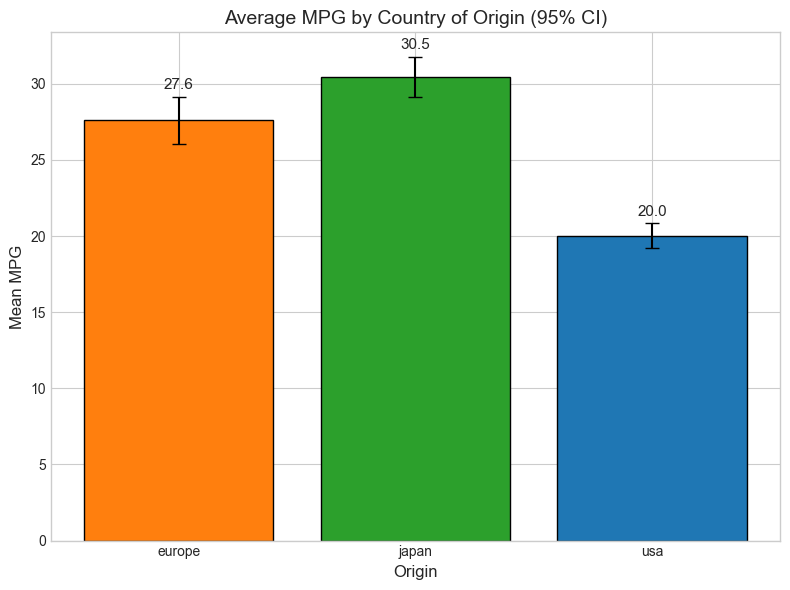

In [344]:
# Exercise 5.2 & 5.3: Interpret and visualize
print("Exercise 5.2: Coefficient Interpretation")
print("=" * 50)
print(f"USA (reference): {model_origin.params[0]:.2f} mpg")
print(f"Europe vs USA: {model_origin.params[1]:+.2f} mpg → Europe = {model_origin.params[0] + model_origin.params[1]:.2f} mpg")
print(f"Japan vs USA: {model_origin.params[2]:+.2f} mpg → Japan = {model_origin.params[0] + model_origin.params[2]:.2f} mpg")
print("\n→ Japan has the highest average mpg, followed by Europe, then USA")

# Exercise 5.3: Bar plot
fig, ax = plt.subplots(figsize=(8, 6))

means = mpg.groupby('origin')['mpg'].mean()
stds = mpg.groupby('origin')['mpg'].std()
counts = mpg.groupby('origin')['mpg'].count()
sems = stds / np.sqrt(counts)

colors = ['#ff7f0e', '#2ca02c', '#1f77b4']  # usa, europe, japan
ax.bar(means.index, means.values, yerr=1.96*sems, capsize=5, color=colors, edgecolor='black')
ax.set_xlabel('Origin', fontsize=12)
ax.set_ylabel('Mean MPG', fontsize=12)
ax.set_title('Average MPG by Country of Origin (95% CI)', fontsize=14)

# Add value labels
for i, (origin, mean) in enumerate(means.items()):
    ax.text(i, mean + sems[origin]*1.96 + 0.5, f'{mean:.1f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

---
## 6. Mixed Models (Continuous + Categorical)

Combining continuous and categorical predictors:

**Additive model**: $Y = \beta_0 + \beta_1 X + \beta_2 D + \epsilon$
- Parallel lines for different categories

**Interaction model**: $Y = \beta_0 + \beta_1 X + \beta_2 D + \beta_3 (X \times D) + \epsilon$
- Different slopes for different categories

**Syntax**:
- `y ~ x + C(cat)` → additive
- `y ~ x * C(cat)` → interaction (includes main effects)
- `y ~ x:C(cat)` → interaction only (no main effects)

In [345]:
# Additive model: tip ~ total_bill + smoker
model_additive = smf.ols('tip ~ total_bill + C(smoker)', data=tips).fit()

# Interaction model: tip ~ total_bill * smoker
model_interaction = smf.ols('tip ~ total_bill * C(smoker)', data=tips).fit()

print("Additive Model: tip ~ total_bill + smoker")
print(model_additive.params)
print(f"\nR² = {model_additive.rsquared:.4f}")

print("\n" + "=" * 50)
print("\nInteraction Model: tip ~ total_bill * smoker")
print(model_interaction.params)
print(f"\nR² = {model_interaction.rsquared:.4f}")

Additive Model: tip ~ total_bill + smoker
Intercept          0.814299
C(smoker)[T.No]    0.148924
total_bill         0.105722
dtype: float64

R² = 0.4593


Interaction Model: tip ~ total_bill * smoker
Intercept                     1.564271
C(smoker)[T.No]              -1.204203
total_bill                    0.069590
total_bill:C(smoker)[T.No]    0.067566
dtype: float64

R² = 0.5060


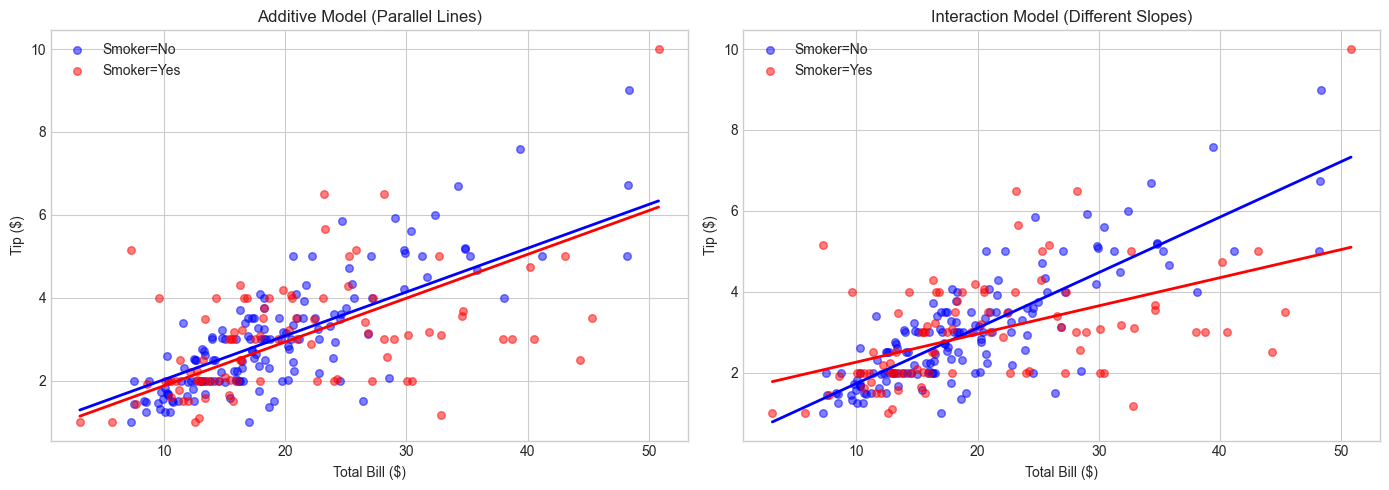

In [346]:
# Visualize both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = {'No': 'blue', 'Yes': 'red'}
bill_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)

# Additive model (parallel lines)
ax1 = axes[0]
for smoker in ['No', 'Yes']:
    subset = tips[tips['smoker'] == smoker]
    ax1.scatter(subset['total_bill'], subset['tip'], alpha=0.5, 
                c=colors[smoker], label=f'Smoker={smoker}', s=30)
    
    pred_df = pd.DataFrame({'total_bill': bill_range, 'smoker': smoker})
    ax1.plot(bill_range, model_additive.predict(pred_df), 
             c=colors[smoker], linewidth=2)

ax1.set_xlabel('Total Bill ($)')
ax1.set_ylabel('Tip ($)')
ax1.set_title('Additive Model (Parallel Lines)', fontsize=12)
ax1.legend()

# Interaction model (different slopes)
ax2 = axes[1]
for smoker in ['No', 'Yes']:
    subset = tips[tips['smoker'] == smoker]
    ax2.scatter(subset['total_bill'], subset['tip'], alpha=0.5, 
                c=colors[smoker], label=f'Smoker={smoker}', s=30)
    
    pred_df = pd.DataFrame({'total_bill': bill_range, 'smoker': smoker})
    ax2.plot(bill_range, model_interaction.predict(pred_df), 
             c=colors[smoker], linewidth=2)

ax2.set_xlabel('Total Bill ($)')
ax2.set_ylabel('Tip ($)')
ax2.set_title('Interaction Model (Different Slopes)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

### Exercise 6: Mixed Models

Use the `mpg` dataset.

**6.1** Fit an additive model: `mpg ~ horsepower + C(origin)`

**6.2** Fit an interaction model: `mpg ~ horsepower * C(origin)`

**6.3** Is the interaction significant? Compare the models using R² and check the interaction p-values.

**6.4** Create a plot showing the regression lines for each origin.

In [347]:
# Exercise 6.1 & 6.2: Fit additive and interaction models
model_add = smf.ols('mpg ~ horsepower + C(origin)', data=mpg).fit()
model_int = smf.ols('mpg ~ horsepower * C(origin)', data=mpg).fit()

print("Exercise 6.1: Additive Model")
print("=" * 50)
print(model_add.params)
print(f"\nR² = {model_add.rsquared:.4f}")

print("\n" + "=" * 50)
print("Exercise 6.2: Interaction Model")
print("=" * 50)
print(model_int.params)
print(f"\nR² = {model_int.rsquared:.4f}")

Exercise 6.1: Additive Model
Intercept             38.369468
C(origin)[T.japan]     2.751013
C(origin)[T.usa]      -2.425339
horsepower            -0.133648
dtype: float64

R² = 0.6621

Exercise 6.2: Interaction Model
Intercept                        45.473726
C(origin)[T.japan]                3.342488
C(origin)[T.usa]                -10.997230
horsepower                       -0.221835
horsepower:C(origin)[T.japan]    -0.008208
horsepower:C(origin)[T.usa]       0.100515
dtype: float64

R² = 0.6831


Exercise 6.3: Is the interaction significant?

Interaction term p-values:
  horsepower:C(origin)[T.japan]: p = 0.8327 ✗ Not significant
  horsepower:C(origin)[T.usa]: p = 0.0003 ✓ Significant

R² Comparison:
  Additive:    0.6621
  Interaction: 0.6831
  Improvement: 2.10 percentage points

→ Interaction is significant: different origins have different HP slopes


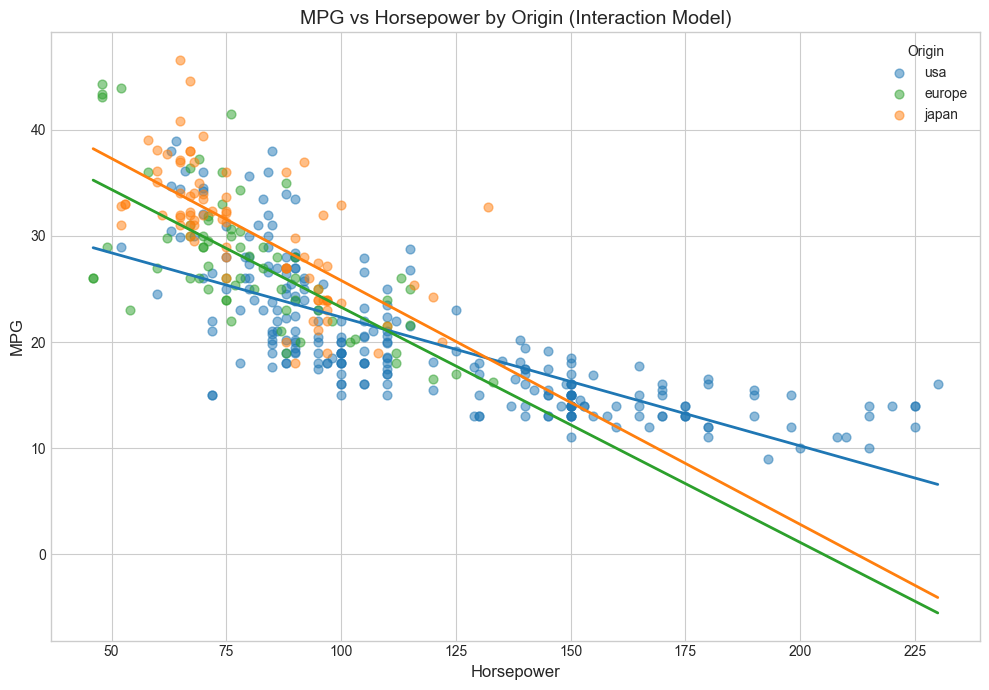


→ The slopes are different: Japanese cars have a steeper decline
   in mpg as horsepower increases compared to US and European cars


In [348]:
# Exercise 6.3 & 6.4: Compare models and visualize
print("Exercise 6.3: Is the interaction significant?")
print("=" * 50)
print("\nInteraction term p-values:")
for param, pval in model_int.pvalues.items():
    if 'horsepower:' in param:
        status = "✓ Significant" if pval < 0.05 else "✗ Not significant"
        print(f"  {param}: p = {pval:.4f} {status}")

print(f"\nR² Comparison:")
print(f"  Additive:    {model_add.rsquared:.4f}")
print(f"  Interaction: {model_int.rsquared:.4f}")
print(f"  Improvement: {(model_int.rsquared - model_add.rsquared)*100:.2f} percentage points")
print("\n→ Interaction is significant: different origins have different HP slopes")

# Exercise 6.4: Plot
fig, ax = plt.subplots(figsize=(10, 7))

colors = {'usa': '#1f77b4', 'europe': '#2ca02c', 'japan': '#ff7f0e'}
hp_range = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)

for origin in ['usa', 'europe', 'japan']:
    subset = mpg[mpg['origin'] == origin]
    ax.scatter(subset['horsepower'], subset['mpg'], alpha=0.5, 
               c=colors[origin], label=origin, s=40)
    
    pred_df = pd.DataFrame({'horsepower': hp_range, 'origin': origin})
    ax.plot(hp_range, model_int.predict(pred_df), 
            c=colors[origin], linewidth=2, linestyle='-')

ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('MPG vs Horsepower by Origin (Interaction Model)', fontsize=14)
ax.legend(title='Origin')
plt.tight_layout()
plt.show()

print("\n→ The slopes are different: Japanese cars have a steeper decline")
print("   in mpg as horsepower increases compared to US and European cars")

---
## 7. Robust Regression

Standard OLS is sensitive to outliers. Robust regression methods downweight outliers:

**Methods in statsmodels**:
- `RLM` (Robust Linear Model) with M-estimators
- Huber's T norm (default): downweights but doesn't fully ignore outliers
- Tukey's bisquare: can completely ignore extreme outliers

**When to use**:
- Data has outliers you want to be robust against
- Residuals have heavy tails
- You suspect influential observations

In [349]:
# Create data with outliers
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
y = 2 + 1.5 * x + np.random.normal(0, 1, n)

# Add outliers
outlier_idx = [10, 25, 50, 75, 90]
y[outlier_idx] = y[outlier_idx] + np.array([-15, -12, 18, 15, 50])

df_outliers = pd.DataFrame({'x': x, 'y': y})

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x, model_ols.fittedvalues, 'b-', linewidth=2, label=f'OLS: y = {model_ols.params[0]:.2f} + {model_ols.params[1]:.2f}x')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x, model_rlm.fittedvalues, 'g--', linewidth=2, label=f'Huber: y = {model_rlm.params[0]:.2f} + {model_rlm.params[1]:.2f}x')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:13: FutureWarning: Series.__

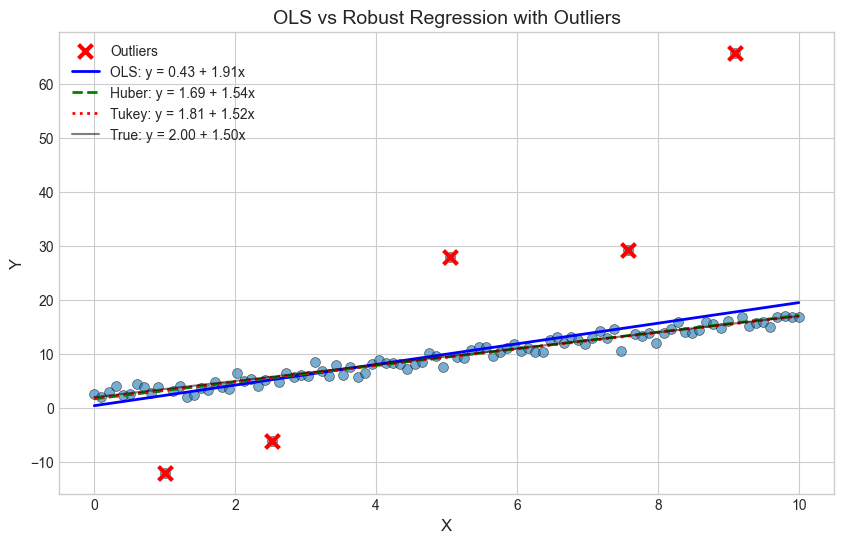

Model Comparison:
Method           Intercept      Slope            True
--------------------------------------------------
OLS                  0.425      1.906        (biased)
Huber                1.693      1.542                
Tukey                1.814      1.516                
True                 2.000      1.500                


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'OLS':<15} {model_ols.params[0]:>10.3f} {model_ols.params[1]:>10.3f} {'(biased)':>15}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Huber':<15} {model_rlm.params[0]:>10.3f} {model_rlm.params[1]:>10.3f} {'':>15}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3050839518.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

In [350]:
# Compare OLS vs Robust Regression
model_ols = smf.ols('y ~ x', data=df_outliers).fit()
model_rlm = smf.rlm('y ~ x', data=df_outliers, M=sm.robust.norms.HuberT()).fit()
model_tukey = smf.rlm('y ~ x', data=df_outliers, M=sm.robust.norms.TukeyBiweight()).fit()

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5, s=50)
ax.scatter(x[outlier_idx], y[outlier_idx], c='red', s=100, marker='x', linewidths=3, label='Outliers')

ax.plot(x, model_ols.fittedvalues, 'b-', linewidth=2, label=f'OLS: y = {model_ols.params[0]:.2f} + {model_ols.params[1]:.2f}x')
ax.plot(x, model_rlm.fittedvalues, 'g--', linewidth=2, label=f'Huber: y = {model_rlm.params[0]:.2f} + {model_rlm.params[1]:.2f}x')
ax.plot(x, model_tukey.fittedvalues, 'r:', linewidth=2, label=f'Tukey: y = {model_tukey.params[0]:.2f} + {model_tukey.params[1]:.2f}x')

# True line
ax.plot(x, 2 + 1.5*x, 'k-', linewidth=1.5, alpha=0.5, label='True: y = 2.00 + 1.50x')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('OLS vs Robust Regression with Outliers', fontsize=14)
ax.legend()
plt.show()

print("Model Comparison:")
print(f"{'Method':<15} {'Intercept':>10} {'Slope':>10} {'True':>15}")
print("-" * 50)
print(f"{'OLS':<15} {model_ols.params[0]:>10.3f} {model_ols.params[1]:>10.3f} {'(biased)':>15}")
print(f"{'Huber':<15} {model_rlm.params[0]:>10.3f} {model_rlm.params[1]:>10.3f} {'':>15}")
print(f"{'Tukey':<15} {model_tukey.params[0]:>10.3f} {model_tukey.params[1]:>10.3f} {'':>15}")
print(f"{'True':<15} {2.0:>10.3f} {1.5:>10.3f} {'':>15}")

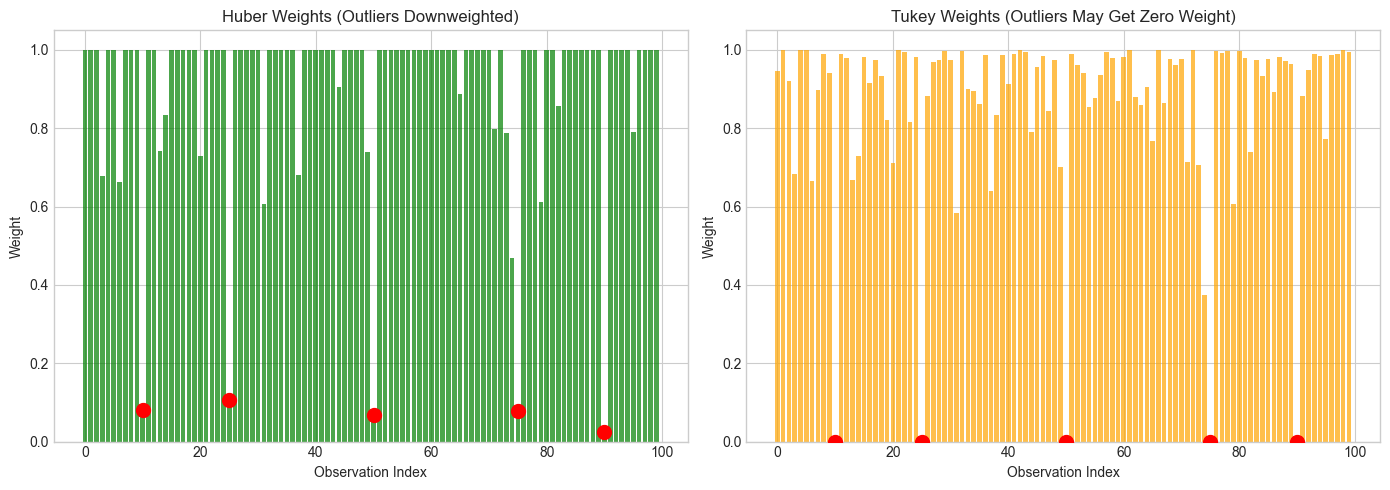


Outlier weights (indices [10, 25, 50, 75, 90]):
Huber: 10    0.081
25    0.105
50    0.067
75    0.078
90    0.025
dtype: float64
Tukey: 10    0.0
25    0.0
50    0.0
75    0.0
90    0.0
dtype: float64


In [351]:
# Examine weights assigned to observations
weights_huber = model_rlm.weights
weights_tukey = model_tukey.weights

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.bar(range(n), weights_huber, color='green', alpha=0.7)
ax1.scatter(outlier_idx, weights_huber[outlier_idx], c='red', s=100, zorder=5)
ax1.set_xlabel('Observation Index')
ax1.set_ylabel('Weight')
ax1.set_title('Huber Weights (Outliers Downweighted)', fontsize=12)

ax2 = axes[1]
ax2.bar(range(n), weights_tukey, color='orange', alpha=0.7)
ax2.scatter(outlier_idx, weights_tukey[outlier_idx], c='red', s=100, zorder=5)
ax2.set_xlabel('Observation Index')
ax2.set_ylabel('Weight')
ax2.set_title('Tukey Weights (Outliers May Get Zero Weight)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nOutlier weights (indices {outlier_idx}):")
print(f"Huber: {weights_huber[outlier_idx].round(3)}")
print(f"Tukey: {weights_tukey[outlier_idx].round(3)}")

### Exercise 7: Robust Regression

We'll create a modified tips dataset with extreme outliers to clearly demonstrate the difference between OLS and robust regression.

**7.1** Run the cell below to create `tips_outliers` - the tips dataset with 5 extreme outliers added. Plot the data.

**7.2** Fit three models predicting tip from total_bill:
- Standard OLS
- Robust regression with Huber norm
- Robust regression with Tukey bisquare

**7.3** Compare the coefficients. How much do they differ? Which method is closest to the original (no outliers) relationship?

**7.4** Plot all three regression lines on the same scatter plot. Mark the outliers clearly.

Original clean data: tip = 0.920 + 0.105 * total_bill
This is the 'true' relationship we want robust regression to recover.

Added 5 extreme outliers at indices: [10, 50, 100, 150, 200]


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/3570350203.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Original clean data: tip = {model_clean.params[0]:.3f} + {model_clean.params[1]:.3f} * total_bill")


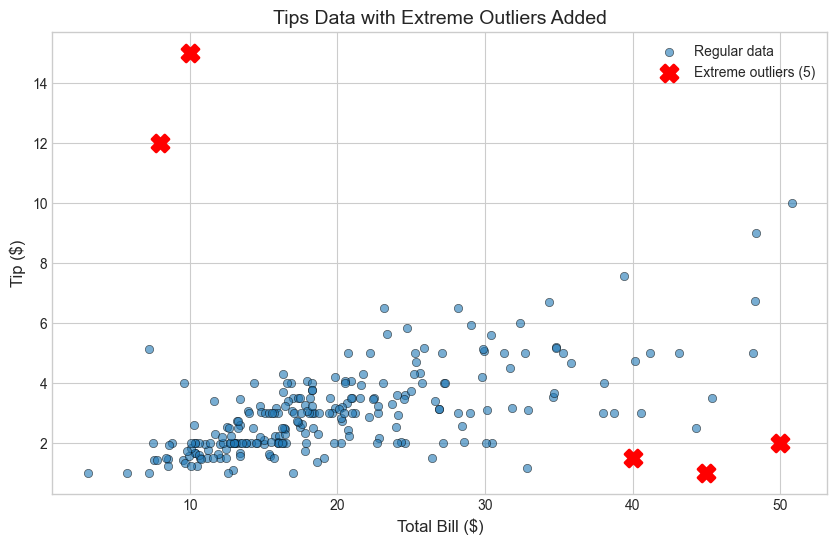


→ These outliers will severely affect OLS but robust methods should resist them


In [352]:
# Exercise 7.1: Create tips dataset with extreme outliers
# First, fit model on CLEAN data to know the "true" relationship
model_clean = smf.ols('tip ~ total_bill', data=tips).fit()
print(f"Original clean data: tip = {model_clean.params[0]:.3f} + {model_clean.params[1]:.3f} * total_bill")
print(f"This is the 'true' relationship we want robust regression to recover.")

# Create modified dataset with extreme outliers
tips_outliers = tips.copy()
np.random.seed(42)

# Add 5 extreme outliers: high bills with very low tips OR low bills with very high tips
outlier_indices = [10, 50, 100, 150, 200]
tips_outliers.loc[outlier_indices[0], ['total_bill', 'tip']] = [45, 1]   # High bill, tiny tip
tips_outliers.loc[outlier_indices[1], ['total_bill', 'tip']] = [50, 2]   # High bill, tiny tip
tips_outliers.loc[outlier_indices[2], ['total_bill', 'tip']] = [8, 12]   # Low bill, huge tip
tips_outliers.loc[outlier_indices[3], ['total_bill', 'tip']] = [40, 1.5] # High bill, tiny tip
tips_outliers.loc[outlier_indices[4], ['total_bill', 'tip']] = [10, 15]  # Low bill, huge tip

print(f"\nAdded 5 extreme outliers at indices: {outlier_indices}")

# Plot the data with outliers marked
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all points
ax.scatter(tips_outliers['total_bill'], tips_outliers['tip'], alpha=0.6, 
           edgecolor='k', linewidth=0.5, label='Regular data')

# Highlight outliers
ax.scatter(tips_outliers.loc[outlier_indices, 'total_bill'], 
           tips_outliers.loc[outlier_indices, 'tip'], 
           c='red', s=150, marker='X', linewidths=2, 
           label=f'Extreme outliers ({len(outlier_indices)})', zorder=5)

ax.set_xlabel('Total Bill ($)', fontsize=12)
ax.set_ylabel('Tip ($)', fontsize=12)
ax.set_title('Tips Data with Extreme Outliers Added', fontsize=14)
ax.legend()
plt.show()

print("\n→ These outliers will severely affect OLS but robust methods should resist them")

In [353]:
# Exercise 7.2: Fit OLS and robust models on contaminated data
model_tips_ols = smf.ols('tip ~ total_bill', data=tips_outliers).fit()
model_tips_huber = smf.rlm('tip ~ total_bill', data=tips_outliers, M=sm.robust.norms.HuberT()).fit()
model_tips_tukey = smf.rlm('tip ~ total_bill', data=tips_outliers, M=sm.robust.norms.TukeyBiweight()).fit()

print("Exercise 7.2: Model Coefficients")
print("=" * 60)
print(f"{'Method':<15} {'Intercept':>12} {'Slope':>12} {'Note':>20}")
print("-" * 60)
print(f"{'Clean OLS':<15} {model_clean.params[0]:>12.4f} {model_clean.params[1]:>12.4f} {'(true relationship)':>20}")
print(f"{'OLS':<15} {model_tips_ols.params[0]:>12.4f} {model_tips_ols.params[1]:>12.4f} {'(affected by outliers)':>20}")
print(f"{'Huber':<15} {model_tips_huber.params[0]:>12.4f} {model_tips_huber.params[1]:>12.4f} {'':>20}")
print(f"{'Tukey':<15} {model_tips_tukey.params[0]:>12.4f} {model_tips_tukey.params[1]:>12.4f} {'':>20}")

print("\n→ Compare how close Huber/Tukey are to Clean OLS vs the corrupted OLS!")

Exercise 7.2: Model Coefficients
Method             Intercept        Slope                 Note
------------------------------------------------------------
Clean OLS             0.9203       0.1050  (true relationship)
OLS                   1.4943       0.0784 (affected by outliers)
Huber                 1.0395       0.0958                     
Tukey                 0.9039       0.1021                     

→ Compare how close Huber/Tukey are to Clean OLS vs the corrupted OLS!


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/1402528057.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Clean OLS':<15} {model_clean.params[0]:>12.4f} {model_clean.params[1]:>12.4f} {'(true relationship)':>20}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/1402528057.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'OLS':<15} {model_tips_ols.params[0]:>12.4f} {model_tips_ols.params[1]:>12.4f} {'(affected by outliers)':>20}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/1402528057.py:12: FutureWarning: Series.__getitem__ treating k

Exercise 7.3: Coefficient Comparison

Model              Intercept        Slope             Recovery
------------------------------------------------------------
Clean OLS             0.9203       0.1050        TRUE baseline
OLS+outliers          1.4943       0.0784            CORRUPTED
Huber                 1.0395       0.0958                     
Tukey                 0.9039       0.1021                     

Slope recovery (how close to true slope 0.1050):
  OLS+outliers error: 0.0266
  Huber error:        0.0092
  Tukey error:        0.0029

→ Robust methods recover slopes much closer to the true relationship!


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/129899702.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Clean OLS':<15} {model_clean.params[0]:>12.4f} {model_clean.params[1]:>12.4f} {'TRUE baseline':>20}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/129899702.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'OLS+outliers':<15} {model_tips_ols.params[0]:>12.4f} {model_tips_ols.params[1]:>12.4f} {'CORRUPTED':>20}")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_48953/129899702.py:8: FutureWarning: Series.__getitem__ treating keys as positions

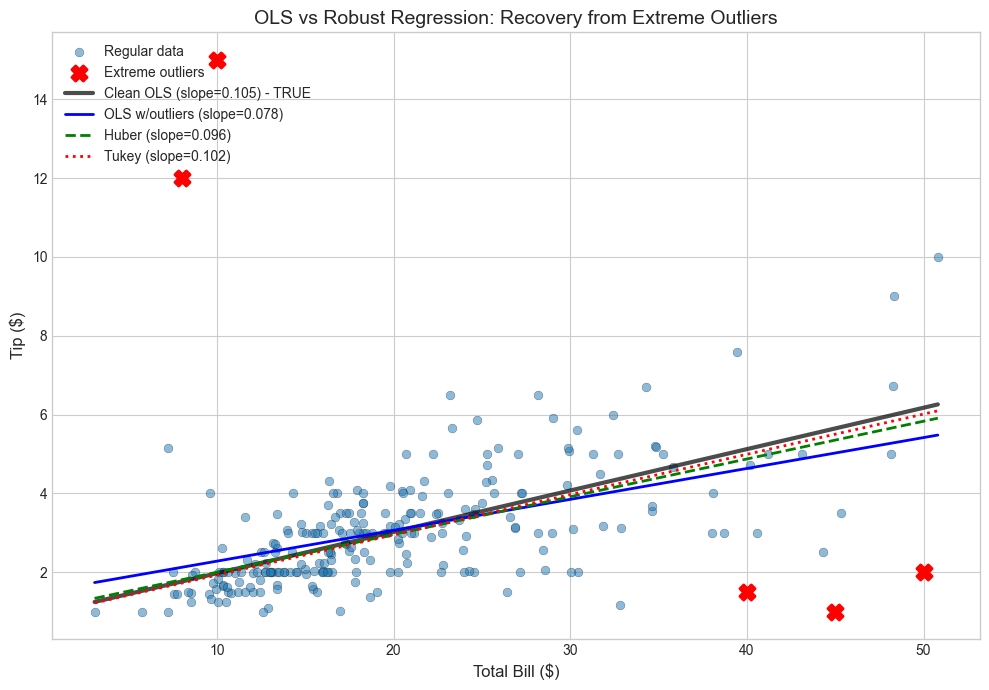


→ Notice how Huber/Tukey lines are close to the TRUE (Clean OLS) line,
   while the OLS+outliers line is pulled away by the extreme points!


In [354]:
# Exercise 7.3 & 7.4: Compare coefficients and plot
print("Exercise 7.3: Coefficient Comparison")
print("=" * 60)
print(f"\n{'Model':<15} {'Intercept':>12} {'Slope':>12} {'Recovery':>20}")
print("-" * 60)
print(f"{'Clean OLS':<15} {model_clean.params[0]:>12.4f} {model_clean.params[1]:>12.4f} {'TRUE baseline':>20}")
print(f"{'OLS+outliers':<15} {model_tips_ols.params[0]:>12.4f} {model_tips_ols.params[1]:>12.4f} {'CORRUPTED':>20}")
print(f"{'Huber':<15} {model_tips_huber.params[0]:>12.4f} {model_tips_huber.params[1]:>12.4f} {'':>20}")
print(f"{'Tukey':<15} {model_tips_tukey.params[0]:>12.4f} {model_tips_tukey.params[1]:>12.4f} {'':>20}")

print(f"\nSlope recovery (how close to true slope {model_clean.params[1]:.4f}):")
print(f"  OLS+outliers error: {abs(model_tips_ols.params[1] - model_clean.params[1]):.4f}")
print(f"  Huber error:        {abs(model_tips_huber.params[1] - model_clean.params[1]):.4f}")
print(f"  Tukey error:        {abs(model_tips_tukey.params[1] - model_clean.params[1]):.4f}")
print("\n→ Robust methods recover slopes much closer to the true relationship!")

# Exercise 7.4: Plot all four lines (including clean OLS reference)
fig, ax = plt.subplots(figsize=(10, 7))

# Plot regular data points
ax.scatter(tips_outliers['total_bill'], tips_outliers['tip'], alpha=0.5, edgecolor='k', linewidth=0.3, s=40, label='Regular data')

# Highlight the extreme outliers
ax.scatter(tips_outliers.loc[outlier_indices, 'total_bill'], 
           tips_outliers.loc[outlier_indices, 'tip'], 
           c='red', s=120, marker='X', linewidths=2, label='Extreme outliers', zorder=5)

bill_range = np.linspace(tips_outliers['total_bill'].min(), tips_outliers['total_bill'].max(), 100)

# Clean OLS line (reference - what we SHOULD recover)
ax.plot(bill_range, model_clean.predict(pd.DataFrame({'total_bill': bill_range})), 
        'k-', linewidth=3, alpha=0.7, label=f'Clean OLS (slope={model_clean.params[1]:.3f}) - TRUE')

# Corrupted OLS line (affected by outliers)
ax.plot(bill_range, model_tips_ols.predict(pd.DataFrame({'total_bill': bill_range})), 
        'b-', linewidth=2, label=f'OLS w/outliers (slope={model_tips_ols.params[1]:.3f})')

# Robust methods
ax.plot(bill_range, model_tips_huber.predict(pd.DataFrame({'total_bill': bill_range})), 
        'g--', linewidth=2, label=f'Huber (slope={model_tips_huber.params[1]:.3f})')
ax.plot(bill_range, model_tips_tukey.predict(pd.DataFrame({'total_bill': bill_range})), 
        'r:', linewidth=2, label=f'Tukey (slope={model_tips_tukey.params[1]:.3f})')

ax.set_xlabel('Total Bill ($)', fontsize=12)
ax.set_ylabel('Tip ($)', fontsize=12)
ax.set_title('OLS vs Robust Regression: Recovery from Extreme Outliers', fontsize=14)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

print("\n→ Notice how Huber/Tukey lines are close to the TRUE (Clean OLS) line,")
print("   while the OLS+outliers line is pulled away by the extreme points!")

---
## 8. Model Diagnostics

Always check regression assumptions:

1. **Linearity**: Residuals vs Fitted should show no pattern
2. **Normality**: Q-Q plot of residuals should be approximately linear
3. **Homoscedasticity**: Residuals should have constant variance
4. **Independence**: Residuals should not be correlated (for time series)

**Example**: Diagnostic plots for a regression model.

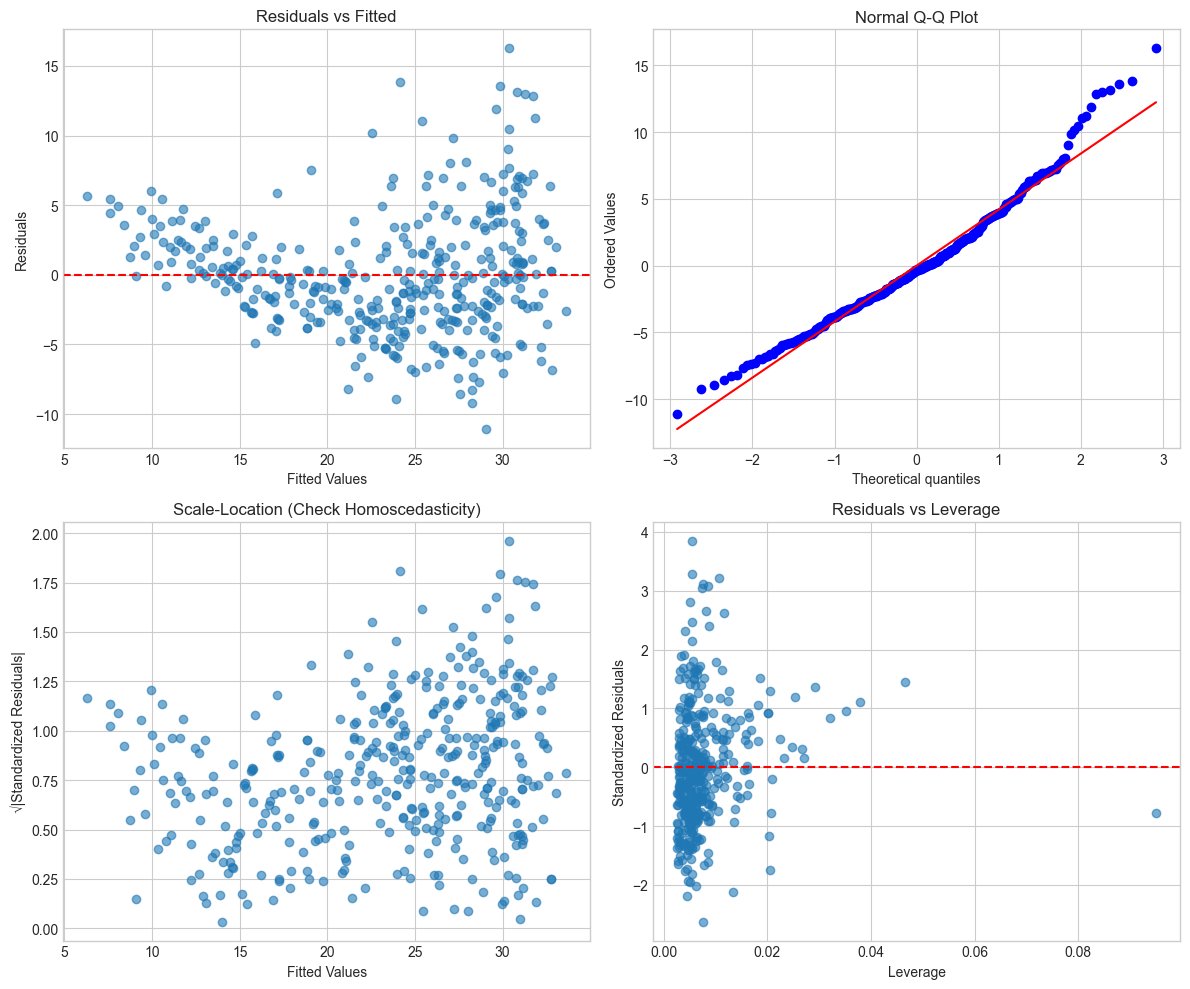

In [355]:
# Fit a model for diagnostics
model = smf.ols('mpg ~ horsepower + weight', data=mpg).fit()

# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted
ax1 = axes[0, 0]
ax1.scatter(model.fittedvalues, model.resid, alpha=0.6)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(model.resid, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot')

# 3. Scale-Location (sqrt of standardized residuals vs fitted)
ax3 = axes[1, 0]
standardized_resid = model.get_influence().resid_studentized_internal
ax3.scatter(model.fittedvalues, np.sqrt(np.abs(standardized_resid)), alpha=0.6)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('√|Standardized Residuals|')
ax3.set_title('Scale-Location (Check Homoscedasticity)')

# 4. Residuals vs Leverage
ax4 = axes[1, 1]
influence = model.get_influence()
leverage = influence.hat_matrix_diag
ax4.scatter(leverage, standardized_resid, alpha=0.6)
ax4.axhline(0, color='red', linestyle='--')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Standardized Residuals')
ax4.set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

### Exercise 8: Model Diagnostics

Use the `diamonds_sample` dataset (1000 rows).

**8.1** Fit a linear model: `price ~ carat + depth + table`

**8.2** Create the four diagnostic plots:
- Residuals vs Fitted
- Q-Q plot of residuals
- Scale-Location plot
- Residuals vs Leverage

**8.3** Based on the diagnostics, are the assumptions met? What improvements might help?

In [356]:
# Exercise 8.1: Fit model
diamonds_sample = diamonds.sample(1000, random_state=42)
model_diag = smf.ols('price ~ carat + depth + table', data=diamonds_sample).fit()

print("Exercise 8.1: Model Summary")
print("=" * 50)
print(f"R² = {model_diag.rsquared:.4f}")
print(model_diag.params)

Exercise 8.1: Model Summary
R² = 0.8661
Intercept    9275.223759
carat        8005.989317
depth        -105.123472
table         -91.384844
dtype: float64


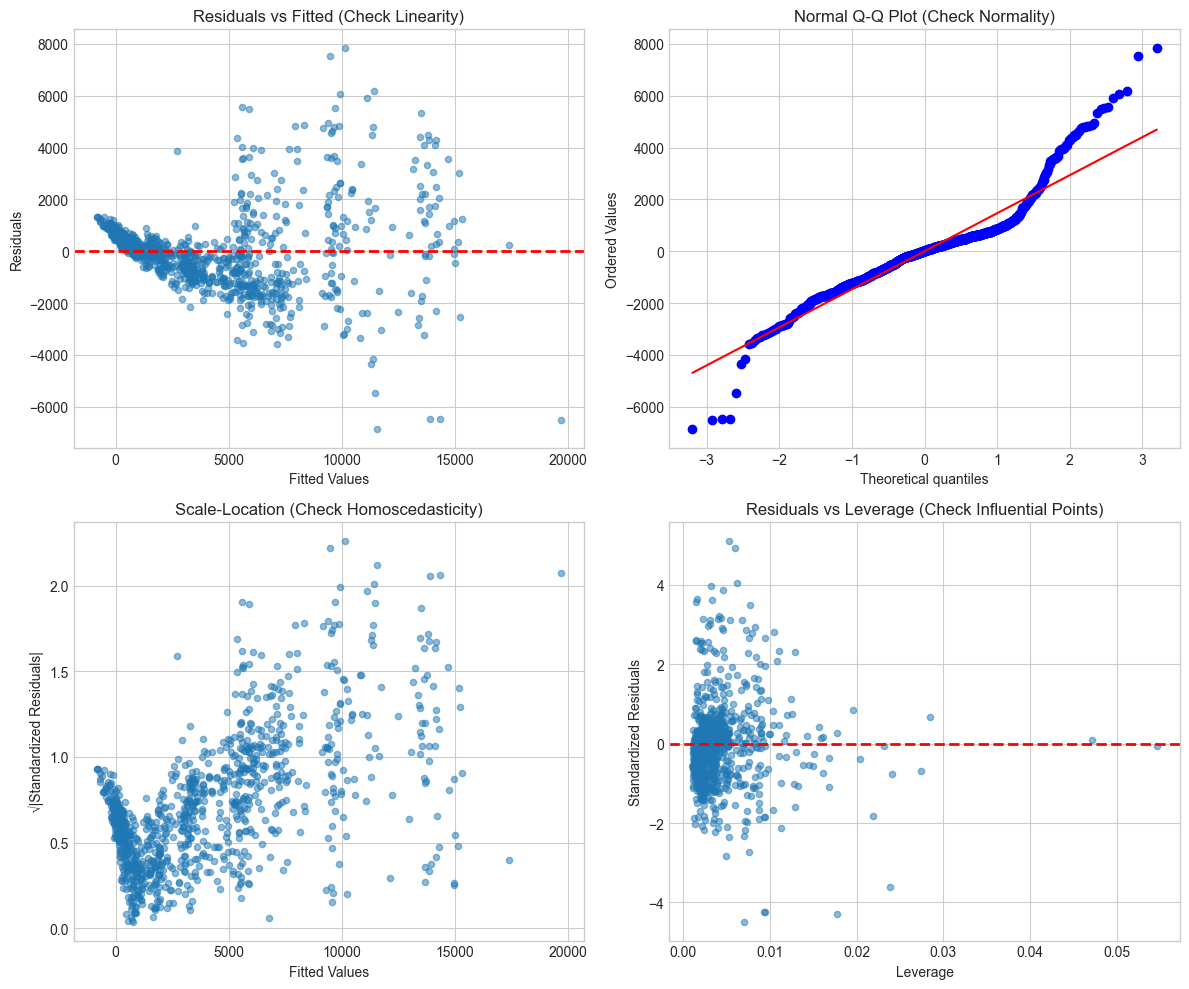


Exercise 8.3: Diagnostic Interpretation

1. LINEARITY (Residuals vs Fitted):
   ✗ Clear funnel pattern - suggests nonlinear relationship
   → Try polynomial terms or log transformation

2. NORMALITY (Q-Q Plot):
   ✗ Heavy tails - residuals are not normally distributed
   → Consider robust regression or log(price)

3. HOMOSCEDASTICITY (Scale-Location):
   ✗ Variance increases with fitted values (heteroscedasticity)
   → Try log transformation or weighted least squares

4. INFLUENTIAL POINTS:
   Some high-leverage points exist, but not extreme

RECOMMENDATION: Try log(price) ~ log(carat) + other predictors


In [357]:
# Exercise 8.2 & 8.3: Diagnostic plots and interpretation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted
ax1 = axes[0, 0]
ax1.scatter(model_diag.fittedvalues, model_diag.resid, alpha=0.5, s=20)
ax1.axhline(0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted (Check Linearity)')

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(model_diag.resid, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot (Check Normality)')

# 3. Scale-Location
ax3 = axes[1, 0]
standardized_resid = model_diag.get_influence().resid_studentized_internal
ax3.scatter(model_diag.fittedvalues, np.sqrt(np.abs(standardized_resid)), alpha=0.5, s=20)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('√|Standardized Residuals|')
ax3.set_title('Scale-Location (Check Homoscedasticity)')

# 4. Residuals vs Leverage
ax4 = axes[1, 1]
influence = model_diag.get_influence()
leverage = influence.hat_matrix_diag
ax4.scatter(leverage, standardized_resid, alpha=0.5, s=20)
ax4.axhline(0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Standardized Residuals')
ax4.set_title('Residuals vs Leverage (Check Influential Points)')

plt.tight_layout()
plt.show()

print("\nExercise 8.3: Diagnostic Interpretation")
print("=" * 60)
print("\n1. LINEARITY (Residuals vs Fitted):")
print("   ✗ Clear funnel pattern - suggests nonlinear relationship")
print("   → Try polynomial terms or log transformation")

print("\n2. NORMALITY (Q-Q Plot):")
print("   ✗ Heavy tails - residuals are not normally distributed")
print("   → Consider robust regression or log(price)")

print("\n3. HOMOSCEDASTICITY (Scale-Location):")
print("   ✗ Variance increases with fitted values (heteroscedasticity)")
print("   → Try log transformation or weighted least squares")

print("\n4. INFLUENTIAL POINTS:")
print("   Some high-leverage points exist, but not extreme")

print("\nRECOMMENDATION: Try log(price) ~ log(carat) + other predictors")

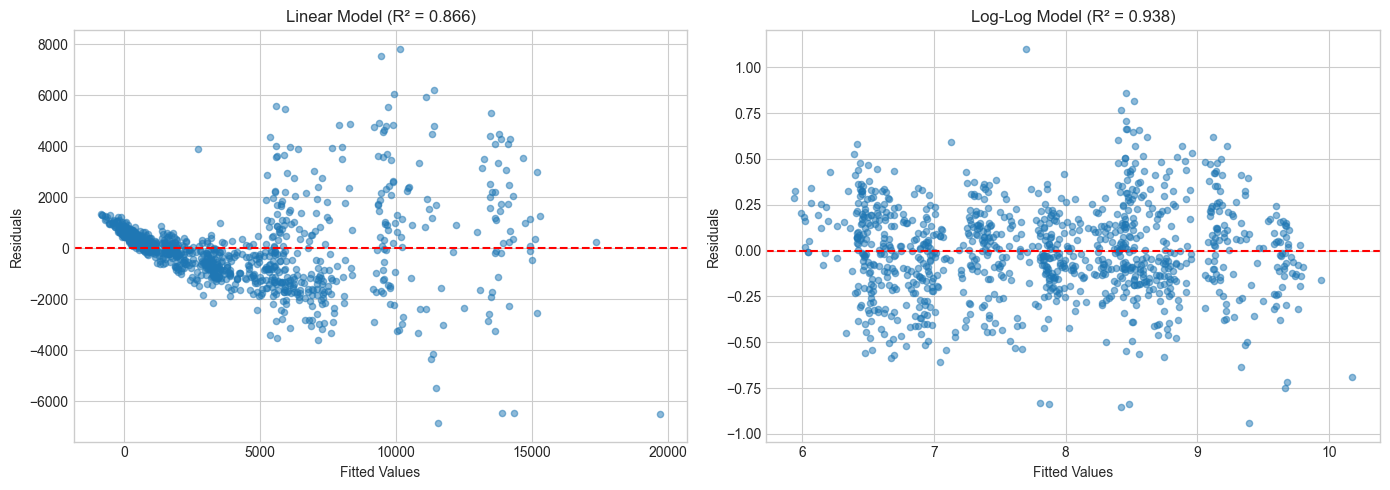

→ Log transformation dramatically improves the model!
   R² improved from 0.866 to 0.938


In [358]:
# Bonus: Try the log transformation and compare diagnostics
model_log = smf.ols('np.log(price) ~ np.log(carat) + depth + table', data=diamonds_sample).fit()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original model residuals
ax1 = axes[0]
ax1.scatter(model_diag.fittedvalues, model_diag.resid, alpha=0.5, s=20)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title(f'Linear Model (R² = {model_diag.rsquared:.3f})')

# Log model residuals
ax2 = axes[1]
ax2.scatter(model_log.fittedvalues, model_log.resid, alpha=0.5, s=20)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_title(f'Log-Log Model (R² = {model_log.rsquared:.3f})')

plt.tight_layout()
plt.show()

print("→ Log transformation dramatically improves the model!")
print(f"   R² improved from {model_diag.rsquared:.3f} to {model_log.rsquared:.3f}")

---
## 9. Weighted Least Squares (WLS) - Heteroscedasticity

When variance is not constant (heteroscedasticity), OLS standard errors are incorrect.

**WLS Solution**: Weight observations by inverse of their variance.

**Model**: Minimize $\sum w_i (y_i - \hat{y}_i)^2$ where $w_i = 1/\sigma_i^2$

**When to use**:
- Residual plots show "funnel" pattern (variance increases with fitted values)
- Breusch-Pagan test rejects homoscedasticity
- Known variance structure (e.g., aggregated data)

**Example**: Data where variance increases with the predictor.

In [359]:
# Example: Weighted Least Squares
from statsmodels.stats.diagnostic import het_breuschpagan

# Generate heteroscedastic data: variance increases with x
np.random.seed(42)
n = 150
x_wls = np.linspace(1, 10, n)
sigma_x = 0.3 + 0.4 * x_wls  # Variance increases with x
y_wls = 1.0 + 2.5 * x_wls + np.random.normal(0, sigma_x)
df_wls = pd.DataFrame({'x': x_wls, 'y': y_wls})

# Fit OLS
model_ols = smf.ols('y ~ x', data=df_wls).fit()

# Breusch-Pagan test
bp_stat, bp_pval, _, _ = het_breuschpagan(model_ols.resid, model_ols.model.exog)
print(f"Breusch-Pagan Test: stat={bp_stat:.2f}, p-value={bp_pval:.4f}")
print(f"Heteroscedasticity detected!" if bp_pval < 0.05 else "No evidence")

# Estimate weights from OLS residuals
abs_resid = np.abs(model_ols.resid)
var_model = smf.ols('abs_resid ~ x', data=pd.DataFrame({'abs_resid': abs_resid, 'x': x_wls})).fit()
estimated_sigma = np.maximum(var_model.predict(), 0.1)
weights = 1 / (estimated_sigma ** 2)

# Fit WLS
model_wls = smf.wls('y ~ x', data=df_wls, weights=weights).fit()

print("\n" + "="*60)
print("OLS vs WLS Comparison:")
print("="*60)
print(f"{'':20} {'OLS':>12} {'WLS':>12}")
print(f"{'Intercept':20} {model_ols.params['Intercept']:>12.4f} {model_wls.params['Intercept']:>12.4f}")
print(f"{'Slope':20} {model_ols.params['x']:>12.4f} {model_wls.params['x']:>12.4f}")
print(f"{'Slope SE':20} {model_ols.bse['x']:>12.4f} {model_wls.bse['x']:>12.4f}")
print(f"\nTrue values: Intercept=1.0, Slope=2.5")

Breusch-Pagan Test: stat=26.10, p-value=0.0000
Heteroscedasticity detected!

OLS vs WLS Comparison:
                              OLS          WLS
Intercept                  0.8325       1.0127
Slope                      2.5004       2.4578
Slope SE                   0.0815       0.0624

True values: Intercept=1.0, Slope=2.5


### Exercise 9: Weighted Least Squares (SOLUTION)

Use the `diamonds_sample` dataset.

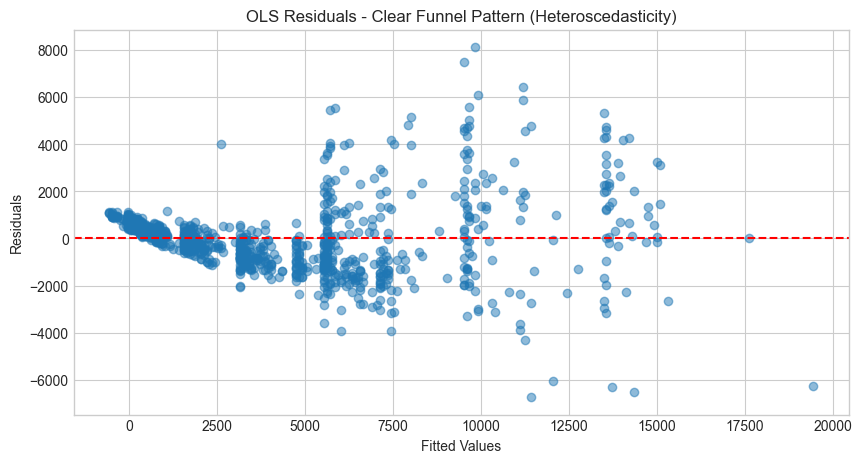


Breusch-Pagan Test:
  Statistic: 221.22
  p-value: 0.000000
  Conclusion: Heteroscedasticity detected!


In [360]:
# Exercise 9.1 & 9.2: OLS, residual plot, and Breusch-Pagan test
diamonds_sample = diamonds.sample(1000, random_state=42)

# Fit OLS
model_ols_ex9 = smf.ols('price ~ carat', data=diamonds_sample).fit()

# Residual plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(model_ols_ex9.fittedvalues, model_ols_ex9.resid, alpha=0.5)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('OLS Residuals - Clear Funnel Pattern (Heteroscedasticity)')
plt.show()

# Breusch-Pagan test
bp_stat, bp_pval, _, _ = het_breuschpagan(model_ols_ex9.resid, model_ols_ex9.model.exog)
print(f"\nBreusch-Pagan Test:")
print(f"  Statistic: {bp_stat:.2f}")
print(f"  p-value: {bp_pval:.6f}")
print(f"  Conclusion: {'Heteroscedasticity detected!' if bp_pval < 0.05 else 'No evidence'}")

In [361]:
# Exercise 9.3 & 9.4: WLS model and comparison
# Estimate weights
abs_resid_ex9 = np.abs(model_ols_ex9.resid)
var_model_ex9 = smf.ols('abs_resid ~ carat', 
                         data=pd.DataFrame({'abs_resid': abs_resid_ex9, 
                                           'carat': diamonds_sample['carat']})).fit()
estimated_sigma_ex9 = np.maximum(var_model_ex9.predict(), 1)
weights_ex9 = 1 / (estimated_sigma_ex9 ** 2)

# Fit WLS
model_wls_ex9 = smf.wls('price ~ carat', data=diamonds_sample, weights=weights_ex9).fit()

print("Exercise 9.4: OLS vs WLS Comparison")
print("="*60)
print(f"{'':20} {'OLS':>15} {'WLS':>15}")
print("-"*50)
print(f"{'Intercept':20} {model_ols_ex9.params['Intercept']:>15.2f} {model_wls_ex9.params['Intercept']:>15.2f}")
print(f"{'Carat coefficient':20} {model_ols_ex9.params['carat']:>15.2f} {model_wls_ex9.params['carat']:>15.2f}")
print(f"{'Carat SE':20} {model_ols_ex9.bse['carat']:>15.2f} {model_wls_ex9.bse['carat']:>15.2f}")
print(f"{'R-squared':20} {model_ols_ex9.rsquared:>15.4f} {model_wls_ex9.rsquared:>15.4f}")
print("\nConclusion: WLS gives different (often more efficient) standard errors when")
print("heteroscedasticity is present. For diamond prices, variance clearly increases with carat.")

Exercise 9.4: OLS vs WLS Comparison
                                 OLS             WLS
--------------------------------------------------
Intercept                   -2408.09        -1476.48
Carat coefficient            7943.48         6590.49
Carat SE                       99.93           87.42
R-squared                     0.8636          0.8506

Conclusion: WLS gives different (often more efficient) standard errors when
heteroscedasticity is present. For diamond prices, variance clearly increases with carat.


---
## 10. Time Series Regression - Autocorrelated Errors

In time series, residuals are often correlated over time (autocorrelation).

**Problem**: OLS standard errors are incorrect when errors are autocorrelated.

**Detection**:
- Durbin-Watson statistic: DW ≈ 2 means no autocorrelation
- ACF plot of residuals

**Solution**: GLS with AR(1) errors (Cochrane-Orcutt transformation)

In [362]:
# Example: Time Series with Autocorrelated Errors
from statsmodels.stats.stattools import durbin_watson

# Generate AR(1) errors
np.random.seed(42)
n_ts = 100
rho = 0.7

t = np.arange(1, n_ts + 1)
x_ts = 0.1 * t + np.sin(t / 10) * 2

errors = np.zeros(n_ts)
errors[0] = np.random.normal(0, 1)
for i in range(1, n_ts):
    errors[i] = rho * errors[i-1] + np.random.normal(0, 1)

y_ts = 1.0 + 2.0 * x_ts + errors
df_ts = pd.DataFrame({'t': t, 'x': x_ts, 'y': y_ts})

# Fit OLS
model_ts_ols = smf.ols('y ~ x', data=df_ts).fit()
dw = durbin_watson(model_ts_ols.resid)

print(f"OLS Durbin-Watson: {dw:.3f}")
print(f"Interpretation: {'Positive autocorrelation!' if dw < 1.5 else 'OK'}")

# Estimate rho and apply Cochrane-Orcutt
estimated_rho = np.corrcoef(model_ts_ols.resid[:-1], model_ts_ols.resid[1:])[0, 1]
y_star = y_ts[1:] - estimated_rho * y_ts[:-1]
x_star = x_ts[1:] - estimated_rho * x_ts[:-1]

model_ts_gls = smf.ols('y_star ~ x_star', 
                        data=pd.DataFrame({'y_star': y_star, 'x_star': x_star})).fit()

print(f"\nEstimated ρ: {estimated_rho:.3f} (true: {rho})")
print(f"GLS Durbin-Watson: {durbin_watson(model_ts_gls.resid):.3f}")

OLS Durbin-Watson: 0.658
Interpretation: Positive autocorrelation!

Estimated ρ: 0.669 (true: 0.7)
GLS Durbin-Watson: 1.997


### Exercise 10: Time Series Regression (SOLUTION)

In [363]:
# Exercise 10.1 & 10.2: Generate data and fit OLS
np.random.seed(123)
n_ex10 = 120
rho_ex10 = 0.6
t_ex10 = np.arange(1, n_ex10 + 1)
x_ex10 = 0.08 * t_ex10 + np.random.normal(0, 0.5, n_ex10).cumsum() * 0.1

# Generate AR(1) errors
errors_ex10 = np.zeros(n_ex10)
errors_ex10[0] = np.random.normal(0, 0.8)
for i in range(1, n_ex10):
    errors_ex10[i] = rho_ex10 * errors_ex10[i-1] + np.random.normal(0, 0.8)

y_ex10 = 0.5 + 1.5 * x_ex10 + errors_ex10
df_ex10 = pd.DataFrame({'t': t_ex10, 'x': x_ex10, 'y': y_ex10})

# Fit OLS
model_ex10_ols = smf.ols('y ~ x', data=df_ex10).fit()
dw_ex10 = durbin_watson(model_ex10_ols.resid)

print(f"Exercise 10.2: Durbin-Watson = {dw_ex10:.3f}")
print(f"Since DW < 1.5, there is evidence of positive autocorrelation.")

Exercise 10.2: Durbin-Watson = 0.700
Since DW < 1.5, there is evidence of positive autocorrelation.


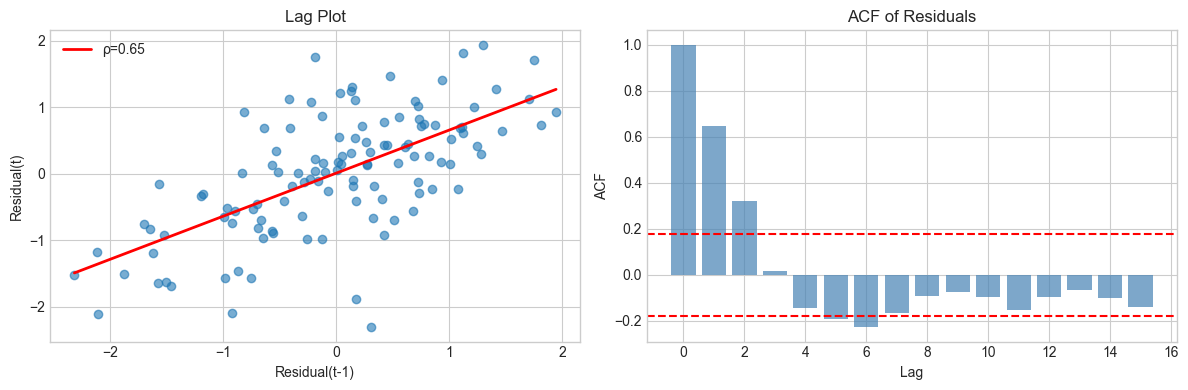


Exercise 10.4: Cochrane-Orcutt Transformation
Estimated ρ: 0.648 (true: 0.6)
OLS Durbin-Watson: 0.700
GLS Durbin-Watson: 1.783

GLS DW ≈ 2 confirms the transformation corrected the autocorrelation.


In [364]:
# Exercise 10.3 & 10.4: Diagnostic plots and Cochrane-Orcutt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Lag plot
ax1 = axes[0]
ax1.scatter(model_ex10_ols.resid[:-1], model_ex10_ols.resid[1:], alpha=0.6)
z_ex10 = np.polyfit(model_ex10_ols.resid[:-1], model_ex10_ols.resid[1:], 1)
ax1.plot(np.linspace(model_ex10_ols.resid.min(), model_ex10_ols.resid.max(), 50),
         np.poly1d(z_ex10)(np.linspace(model_ex10_ols.resid.min(), model_ex10_ols.resid.max(), 50)),
         'r-', linewidth=2, label=f'ρ={z_ex10[0]:.2f}')
ax1.set_xlabel('Residual(t-1)')
ax1.set_ylabel('Residual(t)')
ax1.set_title('Lag Plot')
ax1.legend()

# ACF
ax2 = axes[1]
lags_ex10 = range(0, 16)
acf_ex10 = [1.0] + [np.corrcoef(model_ex10_ols.resid[:-lag], model_ex10_ols.resid[lag:])[0, 1] for lag in range(1, 16)]
ax2.bar(lags_ex10, acf_ex10, color='steelblue', alpha=0.7)
ax2.axhline(1.96/np.sqrt(n_ex10), color='red', linestyle='--')
ax2.axhline(-1.96/np.sqrt(n_ex10), color='red', linestyle='--')
ax2.set_xlabel('Lag')
ax2.set_ylabel('ACF')
ax2.set_title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Cochrane-Orcutt transformation
est_rho_ex10 = np.corrcoef(model_ex10_ols.resid[:-1], model_ex10_ols.resid[1:])[0, 1]
y_star_ex10 = y_ex10[1:] - est_rho_ex10 * y_ex10[:-1]
x_star_ex10 = x_ex10[1:] - est_rho_ex10 * x_ex10[:-1]

model_ex10_gls = smf.ols('y_star ~ x_star', 
                          data=pd.DataFrame({'y_star': y_star_ex10, 'x_star': x_star_ex10})).fit()

print(f"\nExercise 10.4: Cochrane-Orcutt Transformation")
print(f"Estimated ρ: {est_rho_ex10:.3f} (true: {rho_ex10})")
print(f"OLS Durbin-Watson: {dw_ex10:.3f}")
print(f"GLS Durbin-Watson: {durbin_watson(model_ex10_gls.resid):.3f}")
print("\nGLS DW ≈ 2 confirms the transformation corrected the autocorrelation.")

---
## 11. Generalized Linear Models (GLM)

GLMs extend linear regression to non-normal response distributions.

**Components**:
1. **Random component**: Distribution of Y (Normal, Binomial, Poisson, Gamma...)
2. **Systematic component**: Linear predictor η = β₀ + β₁X₁ + ...
3. **Link function**: g(μ) = η

**Common GLMs**:

| Response Type | Distribution | Link | Model Name |
|--------------|--------------|------|------------|
| Continuous | Normal | Identity | Linear Regression |
| Binary (0/1) | Binomial | Logit | Logistic Regression |
| Count | Poisson | Log | Poisson Regression |
| Positive continuous | Gamma | Log | Gamma Regression |

In [365]:
# Example: GLM with different distributions
# Normal (Gaussian) GLM = Standard Linear Regression
model_normal = sm.GLM(tips['tip'], sm.add_constant(tips['total_bill']), 
                      family=sm.families.Gaussian()).fit()

# Gamma GLM (for positive continuous with right skew)
model_gamma = sm.GLM(tips['tip'], sm.add_constant(tips['total_bill']), 
                     family=sm.families.Gamma(link=sm.families.links.Log())).fit()

print("GLM Comparison: Predicting Tip from Total Bill")
print("="*60)
print(f"\n{'Model':<20} {'AIC':>10} {'Deviance':>12}")
print("-"*45)
print(f"{'Normal (Gaussian)':<20} {model_normal.aic:>10.2f} {model_normal.deviance:>12.2f}")
print(f"{'Gamma (log link)':<20} {model_gamma.aic:>10.2f} {model_gamma.deviance:>12.2f}")

GLM Comparison: Predicting Tip from Total Bill

Model                       AIC     Deviance
---------------------------------------------
Normal (Gaussian)        705.08       252.79
Gamma (log link)         641.09        25.73


### Exercise 11: Generalized Linear Models (SOLUTION)

In [366]:
# Exercise 11.1: Gamma vs Normal GLM for price
diamonds_sample = diamonds.sample(1000, random_state=42)

model_normal_ex11 = sm.GLM(diamonds_sample['price'], 
                           sm.add_constant(diamonds_sample['carat']),
                           family=sm.families.Gaussian()).fit()

model_gamma_ex11 = sm.GLM(diamonds_sample['price'], 
                          sm.add_constant(diamonds_sample['carat']),
                          family=sm.families.Gamma(link=sm.families.links.Log())).fit()

print("Exercise 11.1: Gamma vs Normal GLM")
print("="*50)
print(f"{'Model':<20} {'AIC':>12}")
print("-"*35)
print(f"{'Normal GLM':<20} {model_normal_ex11.aic:>12.2f}")
print(f"{'Gamma GLM':<20} {model_gamma_ex11.aic:>12.2f}")
print(f"\nLower AIC is better. Gamma GLM is more appropriate for")
print("right-skewed positive data like diamond prices.")

Exercise 11.1: Gamma vs Normal GLM
Model                         AIC
-----------------------------------
Normal GLM               17529.76
Gamma GLM                16584.07

Lower AIC is better. Gamma GLM is more appropriate for
right-skewed positive data like diamond prices.


In [367]:
# Exercise 11.2: Logistic regression for expensive diamonds
diamonds_sample['expensive'] = (diamonds_sample['price'] > diamonds_sample['price'].median()).astype(int)

model_logistic = sm.GLM(diamonds_sample['expensive'], 
                        sm.add_constant(diamonds_sample[['carat', 'depth']]),
                        family=sm.families.Binomial()).fit()

print("Exercise 11.2: Logistic Regression")
print("="*50)
print(model_logistic.summary())

print("\nOdds Ratios (exp of coefficients):")
print("-"*40)
for name, coef in model_logistic.params.items():
    print(f"{name:15}: exp({coef:.3f}) = {np.exp(coef):.3f}")
print(f"\nInterpretation: For each 1-carat increase, odds of being")
print(f"expensive multiply by {np.exp(model_logistic.params['carat']):.1f}")

Exercise 11.2: Logistic Regression
                 Generalized Linear Model Regression Results                  
Dep. Variable:              expensive   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -117.42
Date:                Thu, 19 Feb 2026   Deviance:                       234.83
Time:                        22:19:03   Pearson chi2:                 1.28e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6838
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.

In [368]:
# Exercise 11.3: Poisson GLM for count data
np.random.seed(42)
days = np.arange(1, 101)
# Events increase slightly over time
lambda_vals = 3 + 0.05 * days
events = np.random.poisson(lam=lambda_vals)
df_poisson = pd.DataFrame({'day': days, 'events': events})

model_poisson_ex11 = sm.GLM(df_poisson['events'], 
                            sm.add_constant(df_poisson['day']),
                            family=sm.families.Poisson()).fit()

print("Exercise 11.3: Poisson GLM for Count Data")
print("="*50)
print(model_poisson_ex11.summary())

# Check overdispersion
pearson_residuals = model_poisson_ex11.resid_pearson
overdispersion = np.sum(pearson_residuals**2) / model_poisson_ex11.df_resid
print(f"\nOverdispersion check:")
print(f"  Pearson chi2 / df = {overdispersion:.3f}")
print(f"  If >> 1, consider Negative Binomial instead of Poisson")
print(f"  Here: {'Some overdispersion' if overdispersion > 1.5 else 'OK, not overdispersed'}")

Exercise 11.3: Poisson GLM for Count Data
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 events   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -225.36
Date:                Thu, 19 Feb 2026   Deviance:                       108.83
Time:                        22:19:03   Pearson chi2:                     106.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2860
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

---
## 9. Choosing the Right Model

| Situation | Recommended Approach |
|-----------|---------------------|
| Linear relationship | Standard OLS |
| Curved relationship | Polynomial or log transformation |
| Multiplicative relationship | Log-log model |
| Categorical predictors | Use `C(variable)` |
| Different slopes by group | Include interaction terms |
| Outliers present | Robust regression (RLM) |
| Non-constant variance | Weighted LS or robust regression |
| Multiple predictors | Check for multicollinearity (VIF) |

In [369]:
print("KEY TAKEAWAYS")
print("=" * 60)
print()
print("1. LINEAR REGRESSION BASICS:")
print("   • Use smf.ols('y ~ x', data=df) for formula interface")
print("   • Check R² for model fit, p-values for significance")
print()
print("2. NONLINEAR RELATIONSHIPS:")
print("   • Add polynomial terms: I(x**2), I(x**3)")
print("   • Use log transformations: np.log(x)")
print()
print("3. CATEGORICAL VARIABLES:")
print("   • Mark explicitly with C(variable)")
print("   • Interpret coefficients as differences from reference")
print()
print("4. INTERACTIONS:")
print("   • Use * for full interaction (main + interaction)")
print("   • Use : for interaction only")
print()
print("5. ROBUST REGRESSION:")
print("   • Use smf.rlm() when outliers are present")
print("   • Huber is mild, Tukey is aggressive")
print()
print("6. ALWAYS CHECK DIAGNOSTICS:")
print("   • Residual plots for patterns")
print("   • Q-Q plot for normality")
print("   • Consider transformations if assumptions violated")

KEY TAKEAWAYS

1. LINEAR REGRESSION BASICS:
   • Use smf.ols('y ~ x', data=df) for formula interface
   • Check R² for model fit, p-values for significance

2. NONLINEAR RELATIONSHIPS:
   • Add polynomial terms: I(x**2), I(x**3)
   • Use log transformations: np.log(x)

3. CATEGORICAL VARIABLES:
   • Mark explicitly with C(variable)
   • Interpret coefficients as differences from reference

4. INTERACTIONS:
   • Use * for full interaction (main + interaction)
   • Use : for interaction only

5. ROBUST REGRESSION:
   • Use smf.rlm() when outliers are present
   • Huber is mild, Tukey is aggressive

6. ALWAYS CHECK DIAGNOSTICS:
   • Residual plots for patterns
   • Q-Q plot for normality
   • Consider transformations if assumptions violated
